## 📌 What is the Dataset About?
The Default of Credit Card Clients dataset is a comprehensive multivariate classification dataset containing 30,000 instances with 23 features, focused on predicting credit card payment defaults in Taiwan. This dataset was created by I-Cheng Yeh and represents a real-world business problem where financial institutions need to assess credit risk and predict the likelihood of customer defaults. This dataset is specifically designed for binary classification to predict whether a client will default on their credit card payments in the following month.

### Dataset Overview
##### Business Context:
 The dataset addresses credit default prediction for a Taiwan-based credit card issuer from 2005, with the goal of identifying customers likely to default on their payments. This prediction capability enables better credit limit decisions and risk management strategies.​

##### Data Characteristics:
The dataset contains no missing values and includes both categorical and numerical features spanning demographic information, credit data, payment history, and bill statements from April to September 2005.​

### Feature Categories
##### Demographic Features:
1. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
SEX: Gender (1=male, 2=female)​
2. EDUCATION: Education level (1=graduate school, 2=university, 3=high school, 4=others)​
3. MARRIAGE: Marital status (1=married, 2=single, 3=others)​
4. AGE: Age in years​
5. Payment History Features (X6-X11):
6. PAY_0 to PAY_6: Repayment status from September 2005 to April 2005​
7. Scale: -1 = pay duly, 1-9 = payment delay for 1-9+ months​
8. Bill Statement Features (X12-X17):BILL_AMT1 to BILL_AMT6: Amount of bill statements from September 2005 to April 2005 in NT dollars​
9. Payment Amount Features (X18-X23):
PAY_AMT1 to PAY_AMT6: Amount of previous payments from September 2005 to April 2005 in NT dollars​

##### Target Variable
The binary target variable represents default payment status: 1 = default (Yes), 0 = no default (No). This classification problem is crucial for risk assessment and credit decision-making.​

# ✅ WEEK 1: Data Collection & Understanding

 Step 1: Dataset Selection

 Step 2: Load the Data

 Step 3: Explore the Data

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

This cell imports all necessary Python libraries for data analysis, visualization, and machine learning. Pandas and NumPy handle data, Seaborn and Matplotlib create visuals, while Scikit-learn provides tools for preprocessing, modeling, and evaluation. Warnings are suppressed to keep outputs clean and focused.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This mounts Google Drive to the Colab environment, allowing direct access to datasets stored there. It simplifies reading and writing files between Colab and Google Drive, essential for managing large projects and data.

In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/dsml_FINALPROJECT/default of credit card clients-1.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


This loads the obesity dataset into a Pandas DataFrame called df. The CSV file is accessed directly from Google Drive. The dataset contains health, lifestyle, and demographic information used for obesity prediction and classification.

📌 Features in the Dataset
Here are the columns (features) and their meanings:

| Feature Name        | Data Type | Description |
|---------------------|----------|-------------|
| **LIMIT_BAL**         | Integer   |Amount of given credit in NT dollars (includes individual and family/supplementary credit)) |
| **SEX**  | Integer  | Gender (1=male, 2=female) |
| **EDUCATION**        | Integer   | Education level (1=graduate school, 2=university, 3=high school, 4=others) |
| **MARRIAGE**     | Integer   | Marital status (1=married, 2=single, 3=others) |
| **AGE**         | Integer  | Age in years |
| **PAY_0**   | Integer   | Repayment status in September 2005 (-1=pay duly, 1-9=payment delay for 1-9+ months) |
| **PAY_2**  | Integer   | Repayment status in August 2005 (-1=pay duly, 1-9=payment delay for 1-9+ months) |
| **PAY_3**| Integer   | Repayment status in July 2005 (-1=pay duly, 1-9=payment delay for 1-9+ months) |
| **PAY_4** | Integer   | Repayment status in June 2005 (-1=pay duly, 1-9=payment delay for 1-9+ months) |
| **PAY_5**   | Integer   | Repayment status in May 2005 (-1=pay duly, 1-9=payment delay for 1-9+ months) |
| **PAY_6**| Integer  | Repayment status in April 2005 (-1=pay duly, 1-9=payment delay for 1-9+ months) |
| **BILL_AMT1**    | Float   | Amount of bill statement in September 2005 (NT dollars) |
| **BILL_AMT2**    | Float   | Amount of bill statement in August 2005 (NT dollars) |
| **BILL_AMT3**| Float   | Amount of bill statement in July 2005 (NT dollars) |
| **BILL_AMT4**       | Float   | Amount of bill statement in June 2005 (NT dollars) |
| **BILL_AMT5**| Float  | Amount of bill statement in May 2005 (NT dollars) |
| **BILL_AMT6**  | Object   | Amount of bill statement in April 2005 (NT dollars) |
| **PAY_AMT1** | Float    | Amount of previous payment in September 2005 (NT dollars) |
| **PAY_AMT2** | Float    | Amount of previous payment in August 2005 (NT dollars) |
| **PAY_AMT3** | Float    | Amount of previous payment in July 2005 (NT dollars) |
| **PAY_AMT4** | Float    | Amount of previous payment in June 2005 (NT dollars) |
| **PAY_AMT5** | Float    | Amount of previous payment in May 2005 (NT dollars) |
| **PAY_AMT6** | Float    | Amount of previous payment in April 2005 (NT dollars) |
| **default_payment_next_month**   | Integer    | 	Whether the customer defaulted on payment (1=Yes, 0=No) (Target Variable) |


In [ ]:
print(df.shape)

(30000, 25)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
for column in df.columns:
  print(column)

ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default payment next month


The dataset contains 30,000 instances with 23 features, focused on predicting credit card payment defaults in Taiwan. The shape of the DataFrame, as shown by df.shape, is (30000, 25), meaning it has 30,000 rows (instances) and 25 columns (features, including the ID and target).

In [ ]:
df.drop(["ID"],axis=1,inplace=True)

In [ ]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


The 'ID' column was dropped because it is a unique identifier and not a predictive feature for credit card default.

In [ ]:
# Handle missing values
print(df.isnull().sum())

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [ ]:
df.isnull().mean() *100

,0
LIMIT_BAL,0.0
SEX,0.0
EDUCATION,0.0
MARRIAGE,0.0
AGE,0.0
PAY_0,0.0
PAY_2,0.0
PAY_3,0.0
PAY_4,0.0
PAY_5,0.0


In [ ]:
# # Handle missing values using imputation
# for column in df.columns:
#     if df[column].dtype == 'object':  # For categorical variables
#         df[column].fillna(df[column].mode()[0], inplace=True)
#     else:  # For numerical variables
#         df[column].fillna(df[column].median(), inplace=True)

In [ ]:
# Step 2: Handle duplicates
print(df.duplicated().sum())  # check duplicates

35


In [ ]:
# drop duplicates if available
df = df.drop_duplicates()
print(df.duplicated().sum())

0


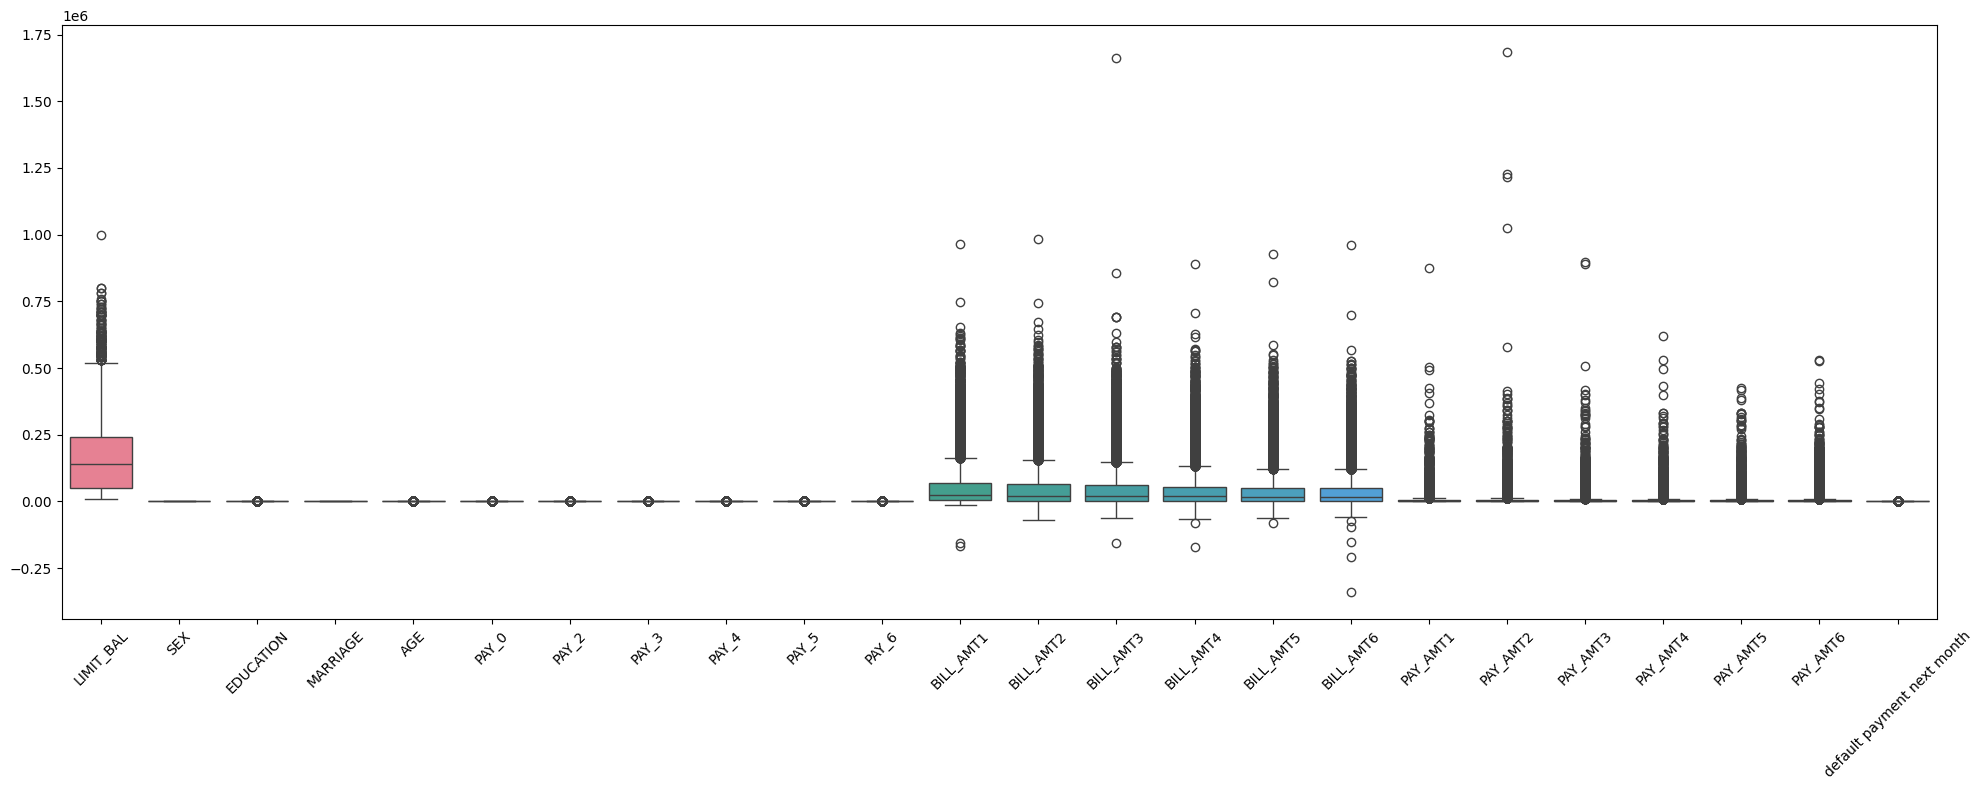

In [ ]:
# box plot before outlier detection - All features
plt.figure(figsize=(20, 8))  # Width=20, Height=8 inches
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


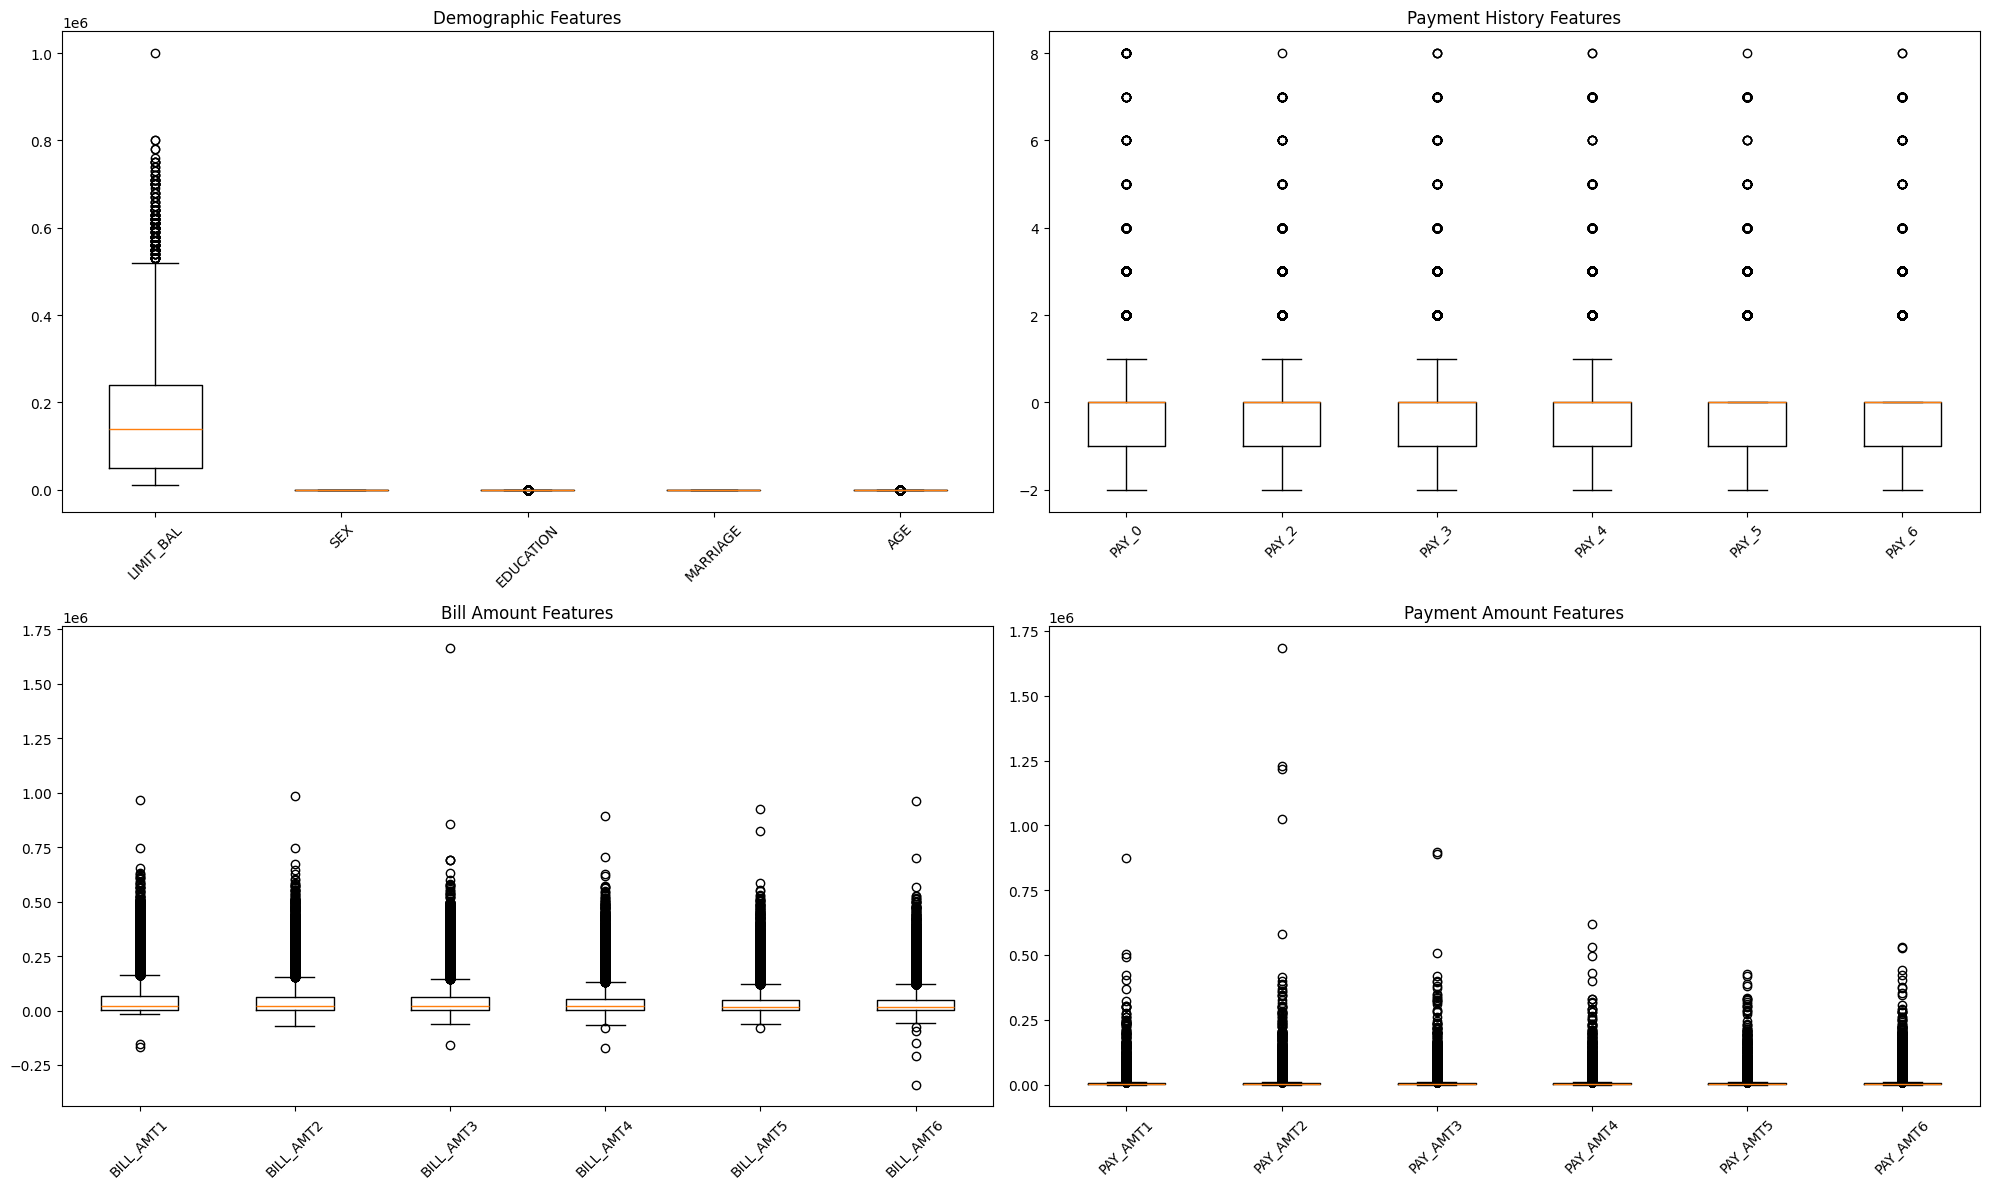

In [ ]:
# Separate plots for different feature groups (Recommended for 24 features)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Demographic features
demographic_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
axes[0,0].boxplot([df[col] for col in demographic_cols])
axes[0,0].set_xticklabels(demographic_cols, rotation=45)
axes[0,0].set_title('Demographic Features')

# Payment history features
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
axes[0,1].boxplot([df[col] for col in payment_cols])
axes[0,1].set_xticklabels(payment_cols, rotation=45)
axes[0,1].set_title('Payment History Features')

# Bill amount features
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
axes[1,0].boxplot([df[col] for col in bill_cols])
axes[1,0].set_xticklabels(bill_cols, rotation=45)
axes[1,0].set_title('Bill Amount Features')

# Payment amount features
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
axes[1,1].boxplot([df[col] for col in pay_amt_cols])
axes[1,1].set_xticklabels(pay_amt_cols, rotation=45)
axes[1,1].set_title('Payment Amount Features')

plt.tight_layout()
plt.show()


These cells check for and remove duplicate rows from the dataset. Then, a box plot visualizes the distribution of all features before outlier detection, highlighting the presence of outliers in several columns, which are addressed in subsequent steps.

In [ ]:
# Step 3: Handling Outliers
# Identify numerical columns for outlier detection
numerical_cols = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

print(f"Numerical columns for outlier detection: {numerical_cols}")

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for each numerical column
outlier_summary = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100,
        'bounds': (lower, upper)
    }
    print(f"{col}: {len(outliers)} outliers ({(len(outliers)/len(df))*100:.2f}%)")

# Apply clipping to handle outliers
print("\nClipping outliers...")
for col in numerical_cols:
    lower_bound, upper_bound = outlier_summary[col]['bounds']
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers clipped successfully!")


Numerical columns for outlier detection: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
LIMIT_BAL: 167 outliers (0.56%)
AGE: 272 outliers (0.91%)
BILL_AMT1: 2386 outliers (7.96%)
BILL_AMT2: 2390 outliers (7.98%)
BILL_AMT3: 2469 outliers (8.24%)
BILL_AMT4: 2616 outliers (8.73%)
BILL_AMT5: 2724 outliers (9.09%)
BILL_AMT6: 2688 outliers (8.97%)
PAY_AMT1: 2742 outliers (9.15%)
PAY_AMT2: 2723 outliers (9.09%)
PAY_AMT3: 2596 outliers (8.66%)
PAY_AMT4: 2993 outliers (9.99%)
PAY_AMT5: 2944 outliers (9.82%)
PAY_AMT6: 2960 outliers (9.88%)

Clipping outliers...
Outliers clipped successfully!


The code then identifies numerical columns and applies IQR-based clipping to handle outliers, printing the count and percentage of outliers found and confirming successful clipping.

In [ ]:
# def handle_outliers(data, columns):
#     for column in columns:
#         if data[column].dtype in ['float64', 'int64']:
#             Q1 = data[column].quantile(0.25)  # 1st quartile
#             Q3 = data[column].quantile(0.75)  # 3rd quartile
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
#             # Clip the outliers
#             data[column] = data[column].clip(lower_bound, upper_bound)

#     return data

# df = handle_outliers(df, df.columns)


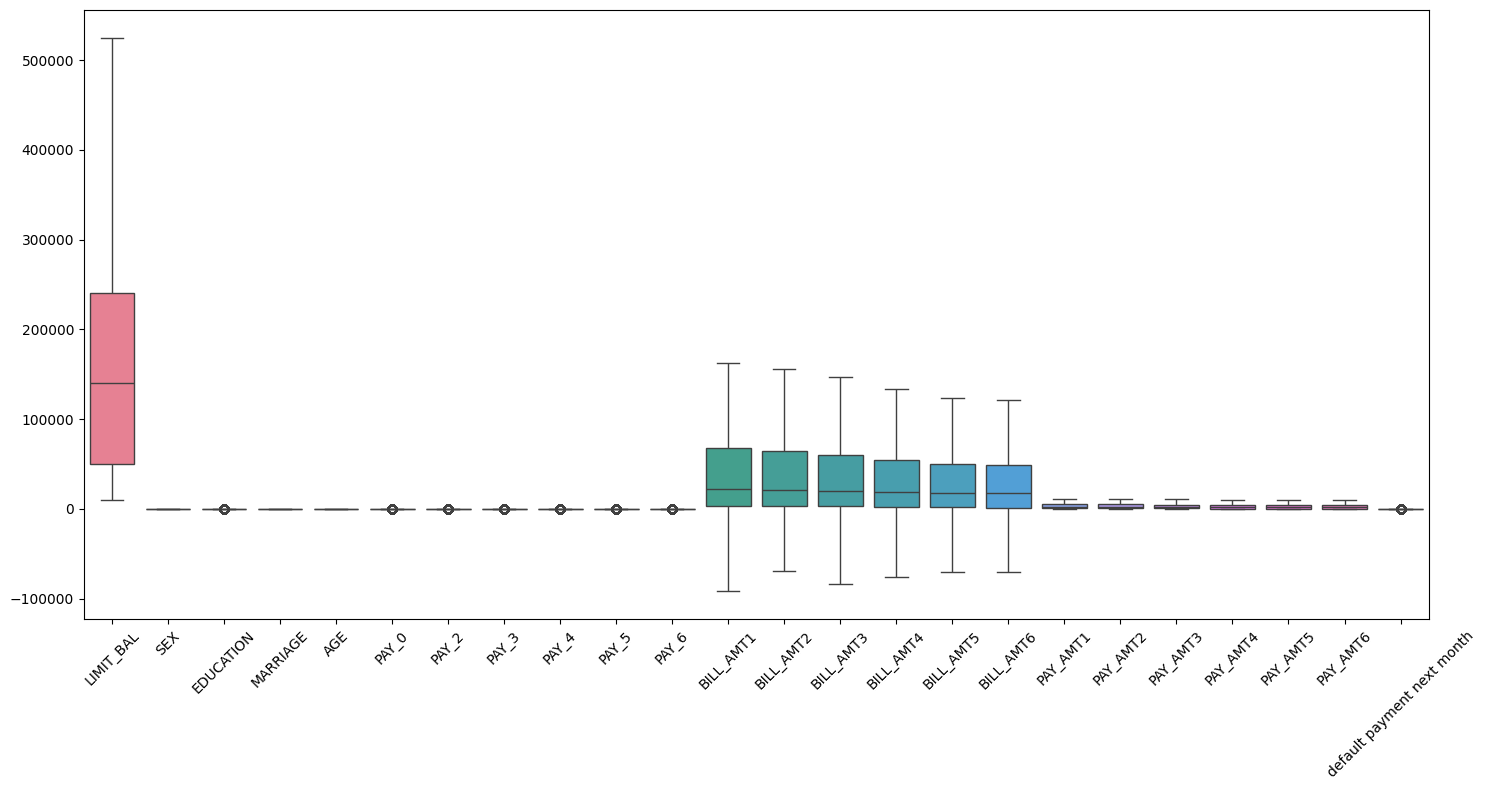

In [ ]:
# box plot after outlier detection - All features
plt.figure(figsize=(15, 8))  # Width=20, Height=8 inches
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


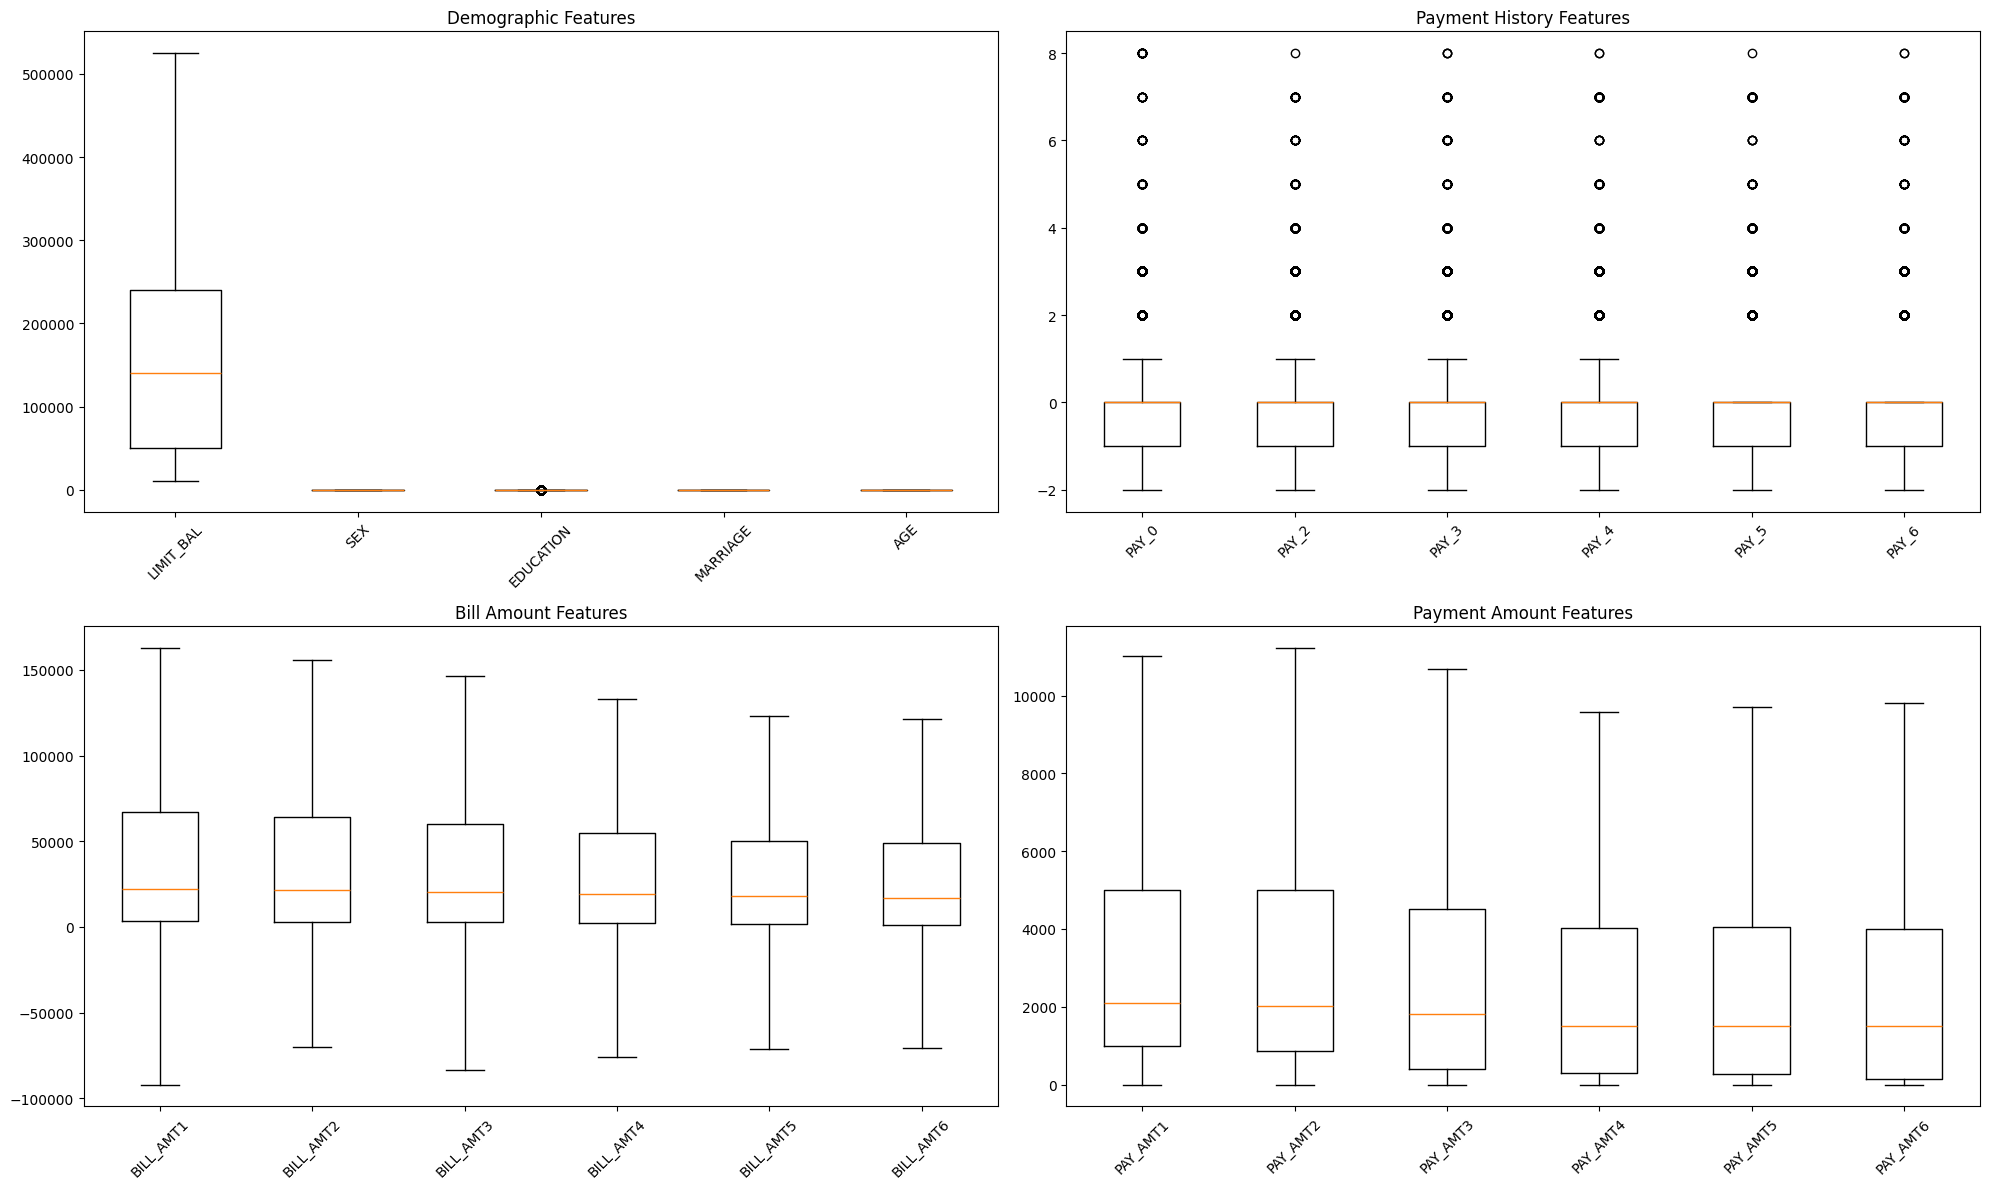

In [ ]:
# Separate plots for different feature groups (Recommended for 24 features)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Demographic features
demographic_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
axes[0,0].boxplot([df[col] for col in demographic_cols])
axes[0,0].set_xticklabels(demographic_cols, rotation=45)
axes[0,0].set_title('Demographic Features')

# Payment history features
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
axes[0,1].boxplot([df[col] for col in payment_cols])
axes[0,1].set_xticklabels(payment_cols, rotation=45)
axes[0,1].set_title('Payment History Features')

# Bill amount features
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
axes[1,0].boxplot([df[col] for col in bill_cols])
axes[1,0].set_xticklabels(bill_cols, rotation=45)
axes[1,0].set_title('Bill Amount Features')

# Payment amount features
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
axes[1,1].boxplot([df[col] for col in pay_amt_cols])
axes[1,1].set_xticklabels(pay_amt_cols, rotation=45)
axes[1,1].set_title('Payment Amount Features')

plt.tight_layout()
plt.show()


box plots of the data after outliers have been handled using clipping. Comparing these plots to the previous ones shows the effect of the outlier treatment on the distribution of the numerical features.

In [ ]:
# skewness= df.select_dtypes("number").skew()
# skewness

In [ ]:
# print("\n SKEWNESS ANALYSIS")
# print("-" * 25)

# skewness_data = {}
# for col in df:
#     skew_value = stats.skew(df[col])
#     skewness_data[col] = skew_value
#     print(f"{col}: {skew_value:.3f}")
#     if abs(skew_value) > 1:
#         print(f"  -> Highly skewed")
#     elif abs(skew_value) > 0.5:
#         print(f"  -> Moderately skewed")
#     else:
#         print(f"  -> Approximately normal")

In [ ]:
# # Apply transformations
# for col in skewness.index:
#     if skewness[col] > 0.5:  # Positively skewed
#         df[col] = np.log1p(df[col])
#         # Replace -inf values with 0 in BILL_AMT columns after log transformation
#         if col in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
#             df[col].replace([np.inf, -np.inf], 0, inplace=True)
#     elif skewness[col] < -0.5:  # Negatively skewed
#         df[col] = np.square(df[col])
#     elif skewness[col] < -1:  # Negatively skewed
#         df[col] = np.square(df[col])

# print("Transformations applied to:", skewness[abs(skewness) > 0.5].index.tolist())
# new_skew = df[col].skew()

In [ ]:
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import PowerTransformer

# Define continuous columns for your credit card dataset
continuous_columns = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

def interpret_skewness(skew_value):
    """Interpret skewness values"""
    if abs(skew_value) < 0.5:
        return "Approximately Symmetric"
    elif abs(skew_value) < 1.0:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"

def log_transform(data, method='log1p'):
    """Apply log transformation"""
    if method == 'log1p':
        # log(x + 1) - handles zeros and small values
        return np.log1p(np.abs(data)) * np.sign(data)
    elif method == 'log':
        # Standard log - only for positive values
        return np.log(data + 1e-8)  # Add small constant to avoid log(0)

def sqrt_transform(data):
    """Apply square root transformation"""
    # Handle negative values by taking square root of absolute value and preserving sign
    return np.sqrt(np.abs(data)) * np.sign(data)

def apply_yeojohnson_transform(data):
    """Apply Yeo-Johnson transformation (handles positive and negative values)"""
    transformed_data, lambda_val = yeojohnson(data)
    return transformed_data, lambda_val

def apply_boxcox_transform(data):
    """Apply Box-Cox transformation (only for positive data)"""
    if np.all(data > 0):
        transformed_data, lambda_val = boxcox(data)
        return transformed_data, lambda_val
    else:
        return None, None

def comprehensive_skewness_correction(df, continuous_cols, skewness_threshold=0.5):
    """
    Comprehensive function to detect and correct skewness in continuous variables
    """

    # Create a copy of the dataframe
    df_transformed = df.copy()
    transformation_results = []

    print("=== SKEWNESS ANALYSIS AND CORRECTION ===\n")

    # Step 1: Analyze original skewness
    print("📊 ORIGINAL SKEWNESS ANALYSIS:")
    print("-" * 50)

    for col in continuous_cols:
        if col in df.columns:
            original_skew = df[col].skew()
            print(f"{col:15s}: {original_skew:8.3f} ({interpret_skewness(original_skew)})")

    print("\n" + "="*60 + "\n")

    # Step 2: Apply transformations
    print("🔄 APPLYING TRANSFORMATIONS:")
    print("-" * 50)

    for col in continuous_cols:
        if col not in df.columns:
            continue

        original_skew = df[col].skew()

        if abs(original_skew) <= skewness_threshold:
            print(f"{col:15s}: No transformation needed (skew: {original_skew:.3f})")
            transformation_results.append({
                'column': col,
                'original_skew': original_skew,
                'transformation': 'None',
                'final_skew': original_skew,
                'lambda': None
            })
            continue

        # Try different transformations and choose the best one
        transformations = {}

        # 1. Log transformation (for positive skewed data)
        if original_skew > 0:
            try:
                log_data = log_transform(df[col], method='log1p')
                transformations['log'] = log_data.skew()
            except:
                transformations['log'] = float('inf')

        # 2. Square root transformation
        try:
            sqrt_data = sqrt_transform(df[col])
            transformations['sqrt'] = sqrt_data.skew()
        except:
            transformations['sqrt'] = float('inf')

        # 3. Yeo-Johnson transformation (best for general use)
        try:
            yj_data, yj_lambda = apply_yeojohnson_transform(df[col])
            transformations['yeo_johnson'] = yj_data.skew()
        except:
            transformations['yeo_johnson'] = float('inf')
            yj_lambda = None

        # 4. Box-Cox transformation (only if all values are positive)
        if np.all(df[col] > 0):
            try:
                bc_data, bc_lambda = apply_boxcox_transform(df[col])
                if bc_data is not None:
                    transformations['box_cox'] = bc_data.skew()
                else:
                    transformations['box_cox'] = float('inf')
            except:
                transformations['box_cox'] = float('inf')
                bc_lambda = None

        # Choose the best transformation (lowest absolute skewness)
        best_transform = min(transformations.items(), key=lambda x: abs(x[1]))
        best_method, best_skew = best_transform

        # Apply the best transformation
        if best_method == 'log':
            df_transformed[col] = log_transform(df[col], method='log1p')
            lambda_val = None
        elif best_method == 'sqrt':
            df_transformed[col] = sqrt_transform(df[col])
            lambda_val = None
        elif best_method == 'yeo_johnson':
            df_transformed[col], lambda_val = apply_yeojohnson_transform(df[col])
        elif best_method == 'box_cox':
            df_transformed[col], lambda_val = apply_boxcox_transform(df[col])

        print(f"{col:15s}: {best_method:12s} | {original_skew:7.3f} → {best_skew:7.3f}")

        transformation_results.append({
            'column': col,
            'original_skew': original_skew,
            'transformation': best_method,
            'final_skew': best_skew,
            'lambda': lambda_val
        })

    return df_transformed, transformation_results

# ===== MAIN IMPLEMENTATION FOR YOUR DATASET =====

# Load your dataset
# df = pd.read_excel('default of credit card clients.xls', header=1)

# Apply comprehensive skewness correction
df_corrected, transformation_results = comprehensive_skewness_correction(df, continuous_columns)

# Create summary report
summary_df = pd.DataFrame(transformation_results)

# Save processed data
# df_corrected.to_csv('credit_card_data_skewness_corrected.csv', index=False)
# summary_df.to_csv('skewness_transformation_summary.csv', index=False)

print("✅ Skewness correction completed!")


=== SKEWNESS ANALYSIS AND CORRECTION ===

📊 ORIGINAL SKEWNESS ANALYSIS:
--------------------------------------------------
LIMIT_BAL      :    0.905 (Moderately Skewed)
AGE            :    0.654 (Moderately Skewed)
BILL_AMT1      :    1.195 (Highly Skewed)
BILL_AMT2      :    1.190 (Highly Skewed)
BILL_AMT3      :    1.183 (Highly Skewed)
BILL_AMT4      :    1.184 (Highly Skewed)
BILL_AMT5      :    1.184 (Highly Skewed)
BILL_AMT6      :    1.199 (Highly Skewed)
PAY_AMT1       :    1.032 (Highly Skewed)
PAY_AMT2       :    1.109 (Highly Skewed)
PAY_AMT3       :    1.201 (Highly Skewed)
PAY_AMT4       :    1.175 (Highly Skewed)
PAY_AMT5       :    1.184 (Highly Skewed)
PAY_AMT6       :    1.207 (Highly Skewed)


🔄 APPLYING TRANSFORMATIONS:
--------------------------------------------------
LIMIT_BAL      : sqrt         |   0.905 →   0.248
AGE            : log          |   0.654 →   0.224
BILL_AMT1      : sqrt         |   1.195 →   0.411
BILL_AMT2      : sqrt         |   1.190 →   0.388


These cells contain code for analyzing and correcting skewness in numerical features using various transformations like log, square root, Yeo-Johnson, and Box-Cox, aiming to make distributions more symmetric for better model performance.

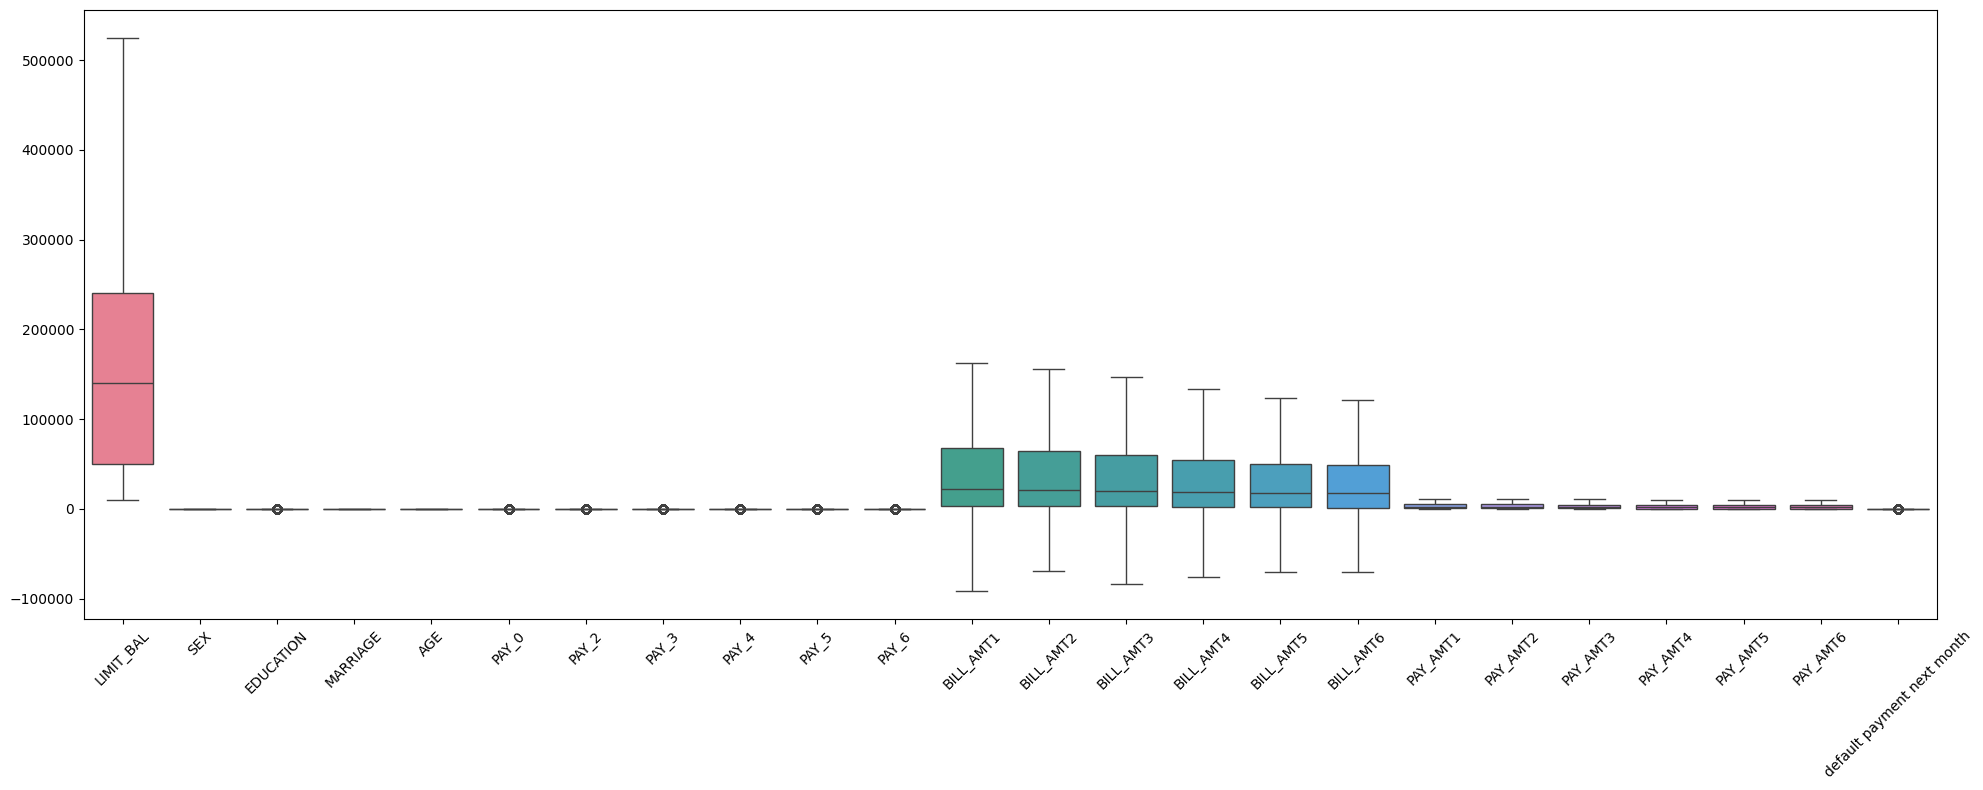

In [ ]:
# box plot after outlier detection and skewness - All features
plt.figure(figsize=(20, 8))  # Width=20, Height=8 inches
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


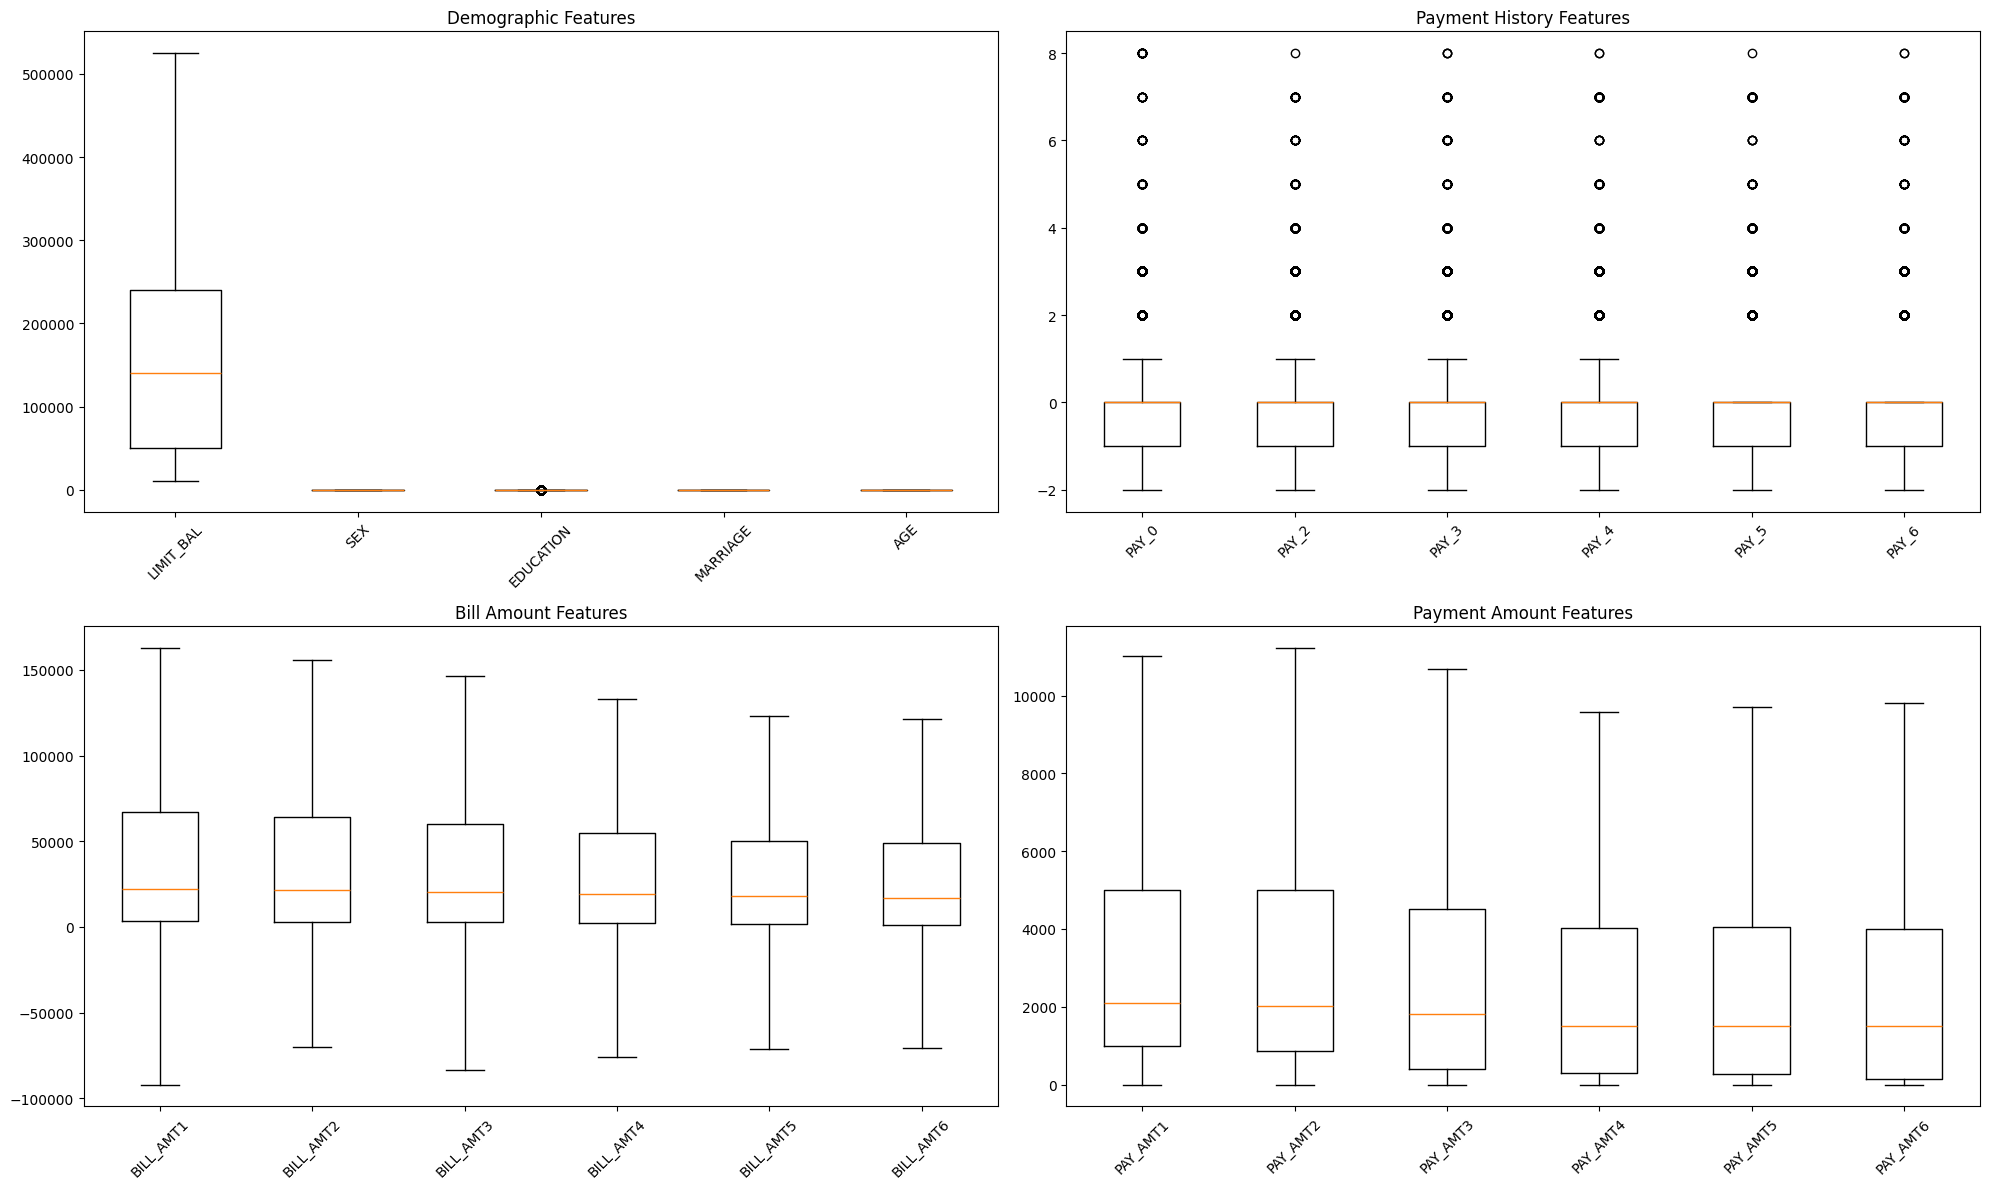

In [ ]:
# Separate plots for different feature groups (Recommended for 24 features)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Demographic features
demographic_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
axes[0,0].boxplot([df[col] for col in demographic_cols])
axes[0,0].set_xticklabels(demographic_cols, rotation=45)
axes[0,0].set_title('Demographic Features')

# Payment history features
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
axes[0,1].boxplot([df[col] for col in payment_cols])
axes[0,1].set_xticklabels(payment_cols, rotation=45)
axes[0,1].set_title('Payment History Features')

# Bill amount features
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
axes[1,0].boxplot([df[col] for col in bill_cols])
axes[1,0].set_xticklabels(bill_cols, rotation=45)
axes[1,0].set_title('Bill Amount Features')

# Payment amount features
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
axes[1,1].boxplot([df[col] for col in pay_amt_cols])
axes[1,1].set_xticklabels(pay_amt_cols, rotation=45)
axes[1,1].set_title('Payment Amount Features')

plt.tight_layout()
plt.show()


In [ ]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24.0,2,2,-1,-1,-2,...,0.0,0,0,0,689,0,0,0.0,0.0,1
1,120000,2,2,2,26.0,-1,2,0,0,0,...,3272.0,3455,3261,0,1000,1000,1000,0.0,2000.0,1
2,90000,2,2,2,34.0,0,0,0,0,0,...,14331.0,14948,15549,1518,1500,1000,1000,1000.0,5000.0,0
3,50000,2,2,1,37.0,0,0,0,0,0,...,28314.0,28959,29547,2000,2019,1200,1100,1069.0,1000.0,0
4,50000,1,2,1,57.0,-1,0,-1,0,0,...,20940.0,19146,19131,2000,11225,10000,9000,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39.0,0,0,0,0,0,...,88004.0,31237,15980,8500,11225,5003,3047,5000.0,1000.0,0
29996,150000,1,3,2,43.0,-1,-1,-1,-1,0,...,8979.0,5190,0,1837,3526,8998,129,0.0,0.0,0
29997,30000,1,2,2,37.0,4,3,2,-1,0,...,20878.0,20582,19357,0,0,10695,4200,2000.0,3100.0,1
29998,80000,1,3,1,41.0,1,-1,0,0,0,...,52774.0,11855,48944,11020,3409,1178,1926,9713.5,1804.0,1


In [ ]:
# # Create a copy for preprocessing
# df_processed = df.copy()

# # Save initial analysis results
# print("\nSAVING INITIAL ANALYSIS")
# print("-" * 30)

# # Save basic statistics to CSV

# df_processed.describe().to_csv('basic_statistics.csv')
# print("Basic statistics saved to 'basic_statistics.csv'")

In [ ]:
# Create a copy for preprocessing
df_processed = df.copy()

# Save initial analysis results
print("\nSAVING INITIAL ANALYSIS")
print("-" * 30)

# Save basic statistics to CSV

df_processed.describe().to_csv('basic_statistics.csv')
print("Basic statistics saved to 'basic_statistics.csv'")

# Save cleaned data
df.to_csv('credit_card_cleaned.csv', index=False)
df.to_pickle('credit_card_cleaned.pkl')  # For faster loading in Python

print("✅ Cleaned dataset saved!")
print("   • credit_card_cleaned.csv (for general use)")
print("   • credit_card_cleaned.pkl (for Python ML)")



SAVING INITIAL ANALYSIS
------------------------------
Basic statistics saved to 'basic_statistics.csv'
✅ Cleaned dataset saved!
   • credit_card_cleaned.csv (for general use)
   • credit_card_cleaned.pkl (for Python ML)


These cells save the processed DataFrame with cleaned data to CSV and pickle files for future use. Basic statistics of the processed data are also saved to a CSV file for initial analysis reference.

#✅ WEEK 2: Data Analysis

## Comprehensive Exploratory Data Analysis (EDA) for Credit Card Default Dataset

Based on your preprocessed dataset with 30,000 records and 25 features, here's a complete EDA framework with specific visualizations and expected insights.

#### 1. Univariate Analysis (Single Variable)
Chart 1: Target Variable Distribution (Bar Plot)

Text(0.5, 1.0, 'Distribution of Default Payment')

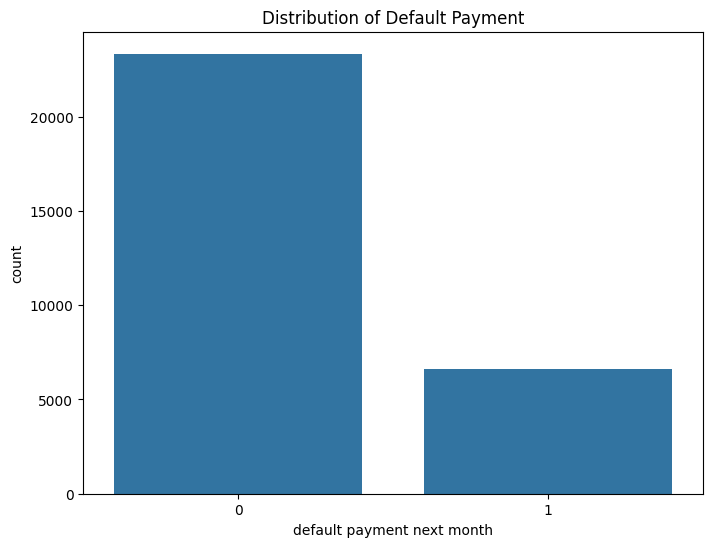

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='default payment next month')
plt.title('Distribution of Default Payment')


Here's what we can infer from this graph:
1. It shows the count of customers who defaulted on their credit card payment (represented by '1') and those who did not default (represented by '0') in the next month.
2. By looking at the heights of the bars, you can see that there are significantly more instances of customers who did not default (0) compared to those who did default (1).
3. This indicates that the dataset is imbalanced, with the majority class being non-defaulters and the minority class being defaulters. This is an important observation for model building, as it might require special techniques to handle the imbalance during training.


In summary, the graph clearly illustrates the class distribution of the target variable and highlights the imbalance in the dataset.

Chart 2: Credit Limit Distribution (Histogram)

Text(0.5, 1.0, 'Distribution of Credit Limits')

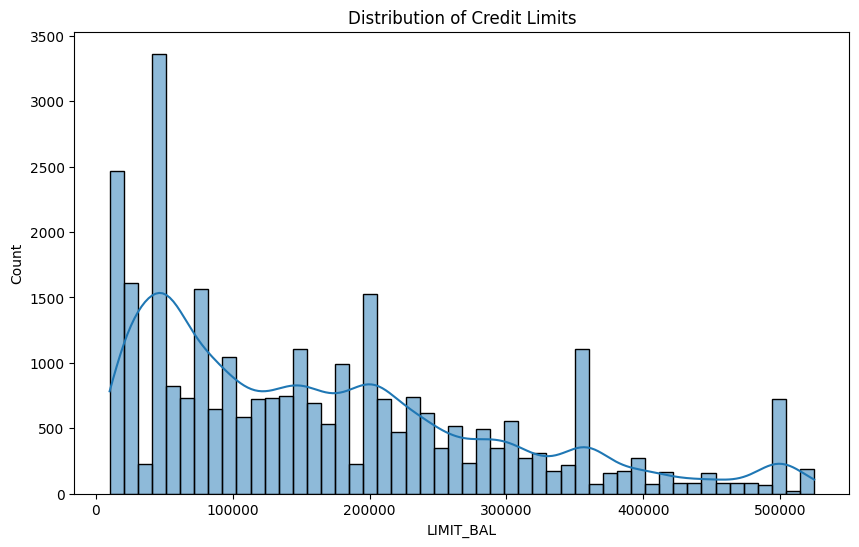

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['LIMIT_BAL'], bins=50, kde=True)
plt.title('Distribution of Credit Limits')

Here's what we can infer from this graph:

1. The x-axis represents the credit limit in NT dollars, and the y-axis represents the frequency or count of customers with that credit limit.

2. The histogram shows that the distribution of credit limits is skewed to the right, meaning there are more customers with lower credit limits and fewer customers with very high credit limits.

3. There are peaks at certain credit limit values, suggesting that credit limits are often assigned in specific increments (e.g., multiples of 50,000 or 100,000 NT dollars).

4. The majority of credit limits appear to be concentrated in the lower range.

In summary, the graph provides a visual understanding of how credit limits are distributed among the clients in the dataset, highlighting the prevalence of lower credit limits and the presence of some high credit limits.



Chart 3: Age Distribution with Outlier Detection (Box Plot)

Text(0.5, 1.0, 'Age Distribution and Outliers')

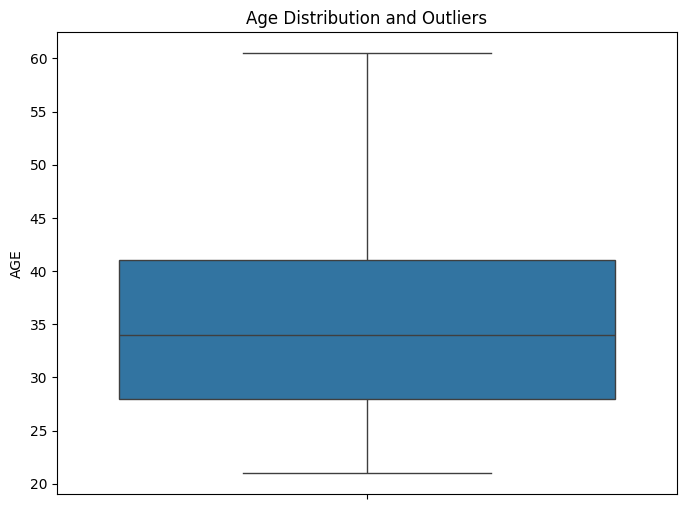

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['AGE'])
plt.title('Age Distribution and Outliers')

Here's what we can infer from this graph:

1. The box in the center represents the interquartile range (IQR), containing the middle 50% of the customer ages. The line inside the box is the median age.
The whiskers extending from the box show the typical range of ages, excluding outliers.

2. Any points plotted individually beyond the whiskers are considered potential outliers, indicating customers who are significantly older or younger than the majority of the dataset.

In summary, the box plot provides a quick visual summary of the age distribution, including the median age, the spread of the middle 50% of ages, and highlights any ages that are considered outliers based on the IQR method.

#### 2 Bivariate Analysis (Two Variables)

Chart 4: Credit Limit vs Default Status (Box Plot)

Text(0.5, 1.0, 'Credit Limit Distribution by Default Status')

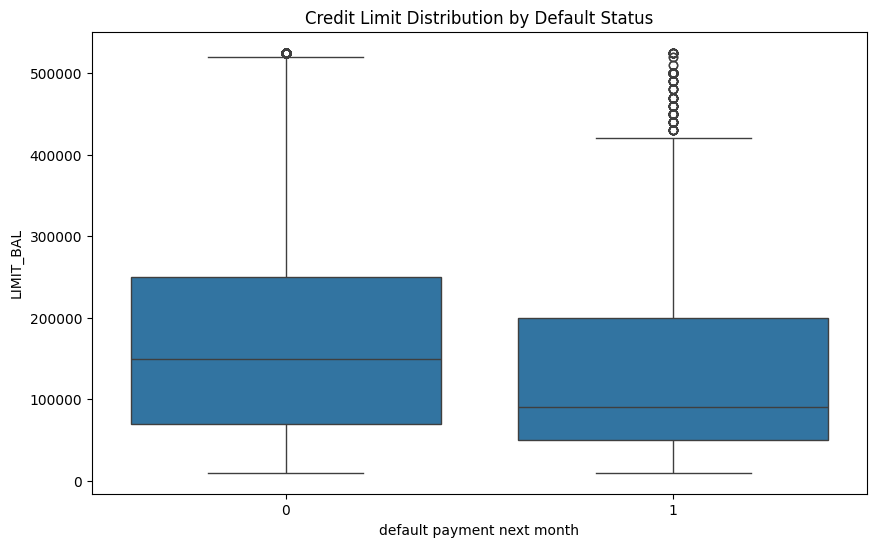

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='default payment next month', y='LIMIT_BAL')
plt.title('Credit Limit Distribution by Default Status')

Here's what we can infer from this graph:

1. There are two boxes, one for customers who did not default (0) and one for customers who defaulted (1).
Comparing the two boxes, you can observe the typical range and median of credit limits for each group.

2. It appears that customers who did not default tend to have higher credit limits on average, with a higher median and potentially a wider spread of higher values, compared to customers who defaulted.

3. Customers who defaulted seem to have generally lower credit limits.

In summary, this box plot suggests that there might be a relationship between credit limit and the likelihood of default, with lower credit limits being more common among those who defaulted.

Chart 5: Correlation Heatmap (Numerical Features)

Text(0.5, 1.0, 'Feature Correlation Matrix')

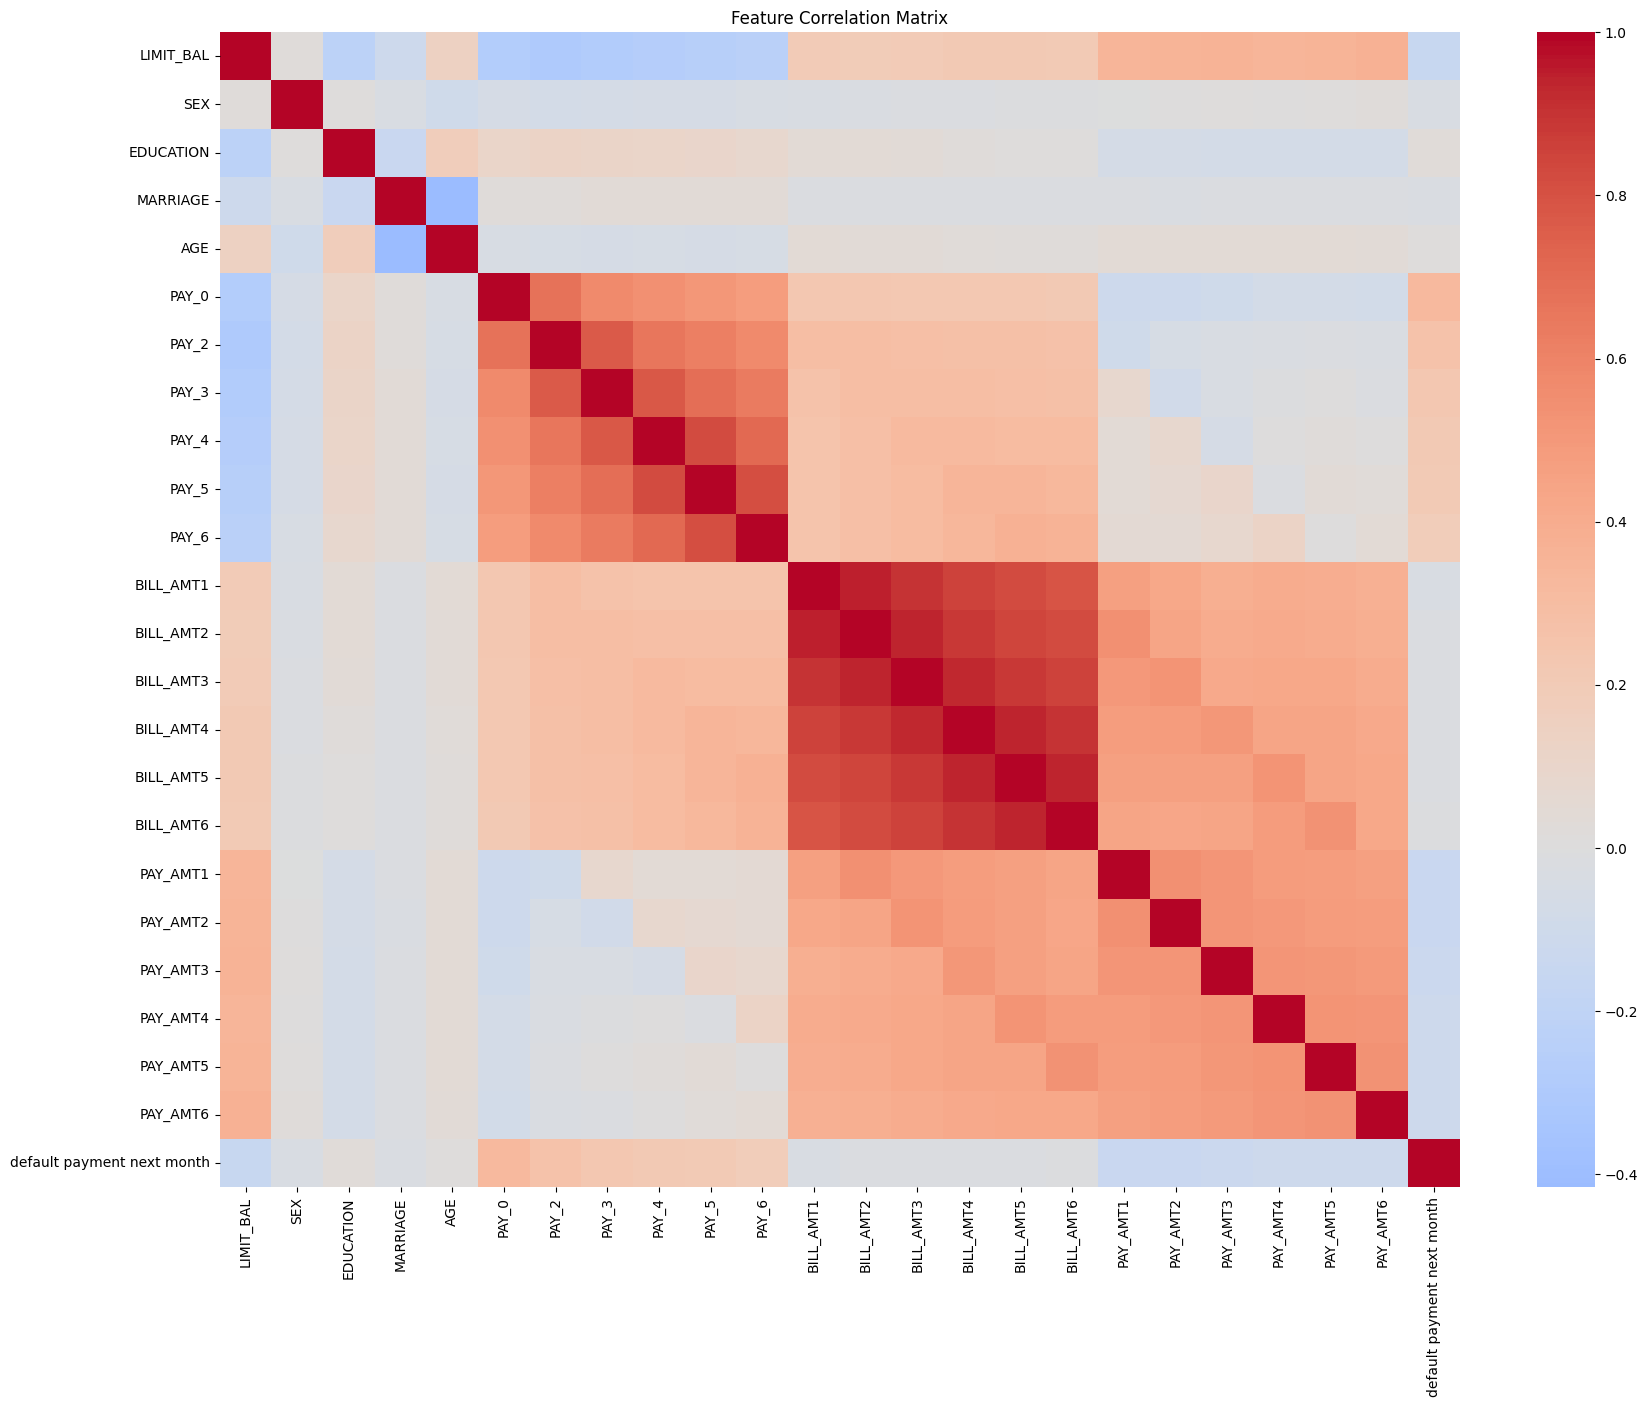

In [ ]:
plt.figure(figsize=(20,15))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

This correlation heatmap visualizes pairwise correlations between numerical features. Colors and values indicate strength and direction (positive/negative). It helps identify relationships, multicollinearity, and feature relevance to the target variable, like positive correlations among bill amounts and negative correlations between credit limit and repayment status.

Chart 6: Gender vs Default Rate (Bar Chart)

Text(0.5, 1.0, 'Default Rate by Gender')

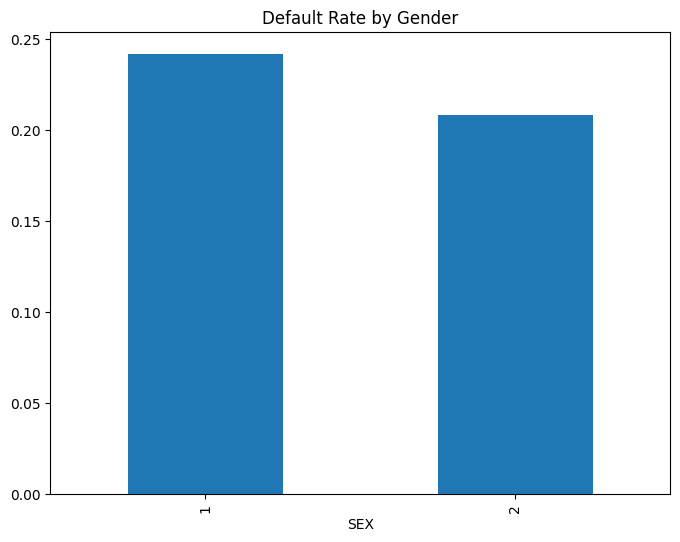

In [ ]:
plt.figure(figsize=(8,6))
default_by_gender = df.groupby('SEX')['default payment next month'].mean()
default_by_gender.plot(kind='bar')
plt.title('Default Rate by Gender')

Here's what we can infer from this graph:

1. There are two bars, one for each gender (1 and 2, representing male and female based on the dataset's description).

2. The height of each bar represents the proportion or percentage of customers within that gender who defaulted on their payment in the next month.

3. By comparing the heights of the bars, you can see which gender group has a higher default rate.

In summary, this bar chart helps visualize if there is a difference in the likelihood of default between male and female customers in the dataset.

#### 3. Multivariate Analysis (More than Two Variables)
Chart 7: Payment History Pairplot

Text(0.5, 0.98, 'Payment History Relationships')

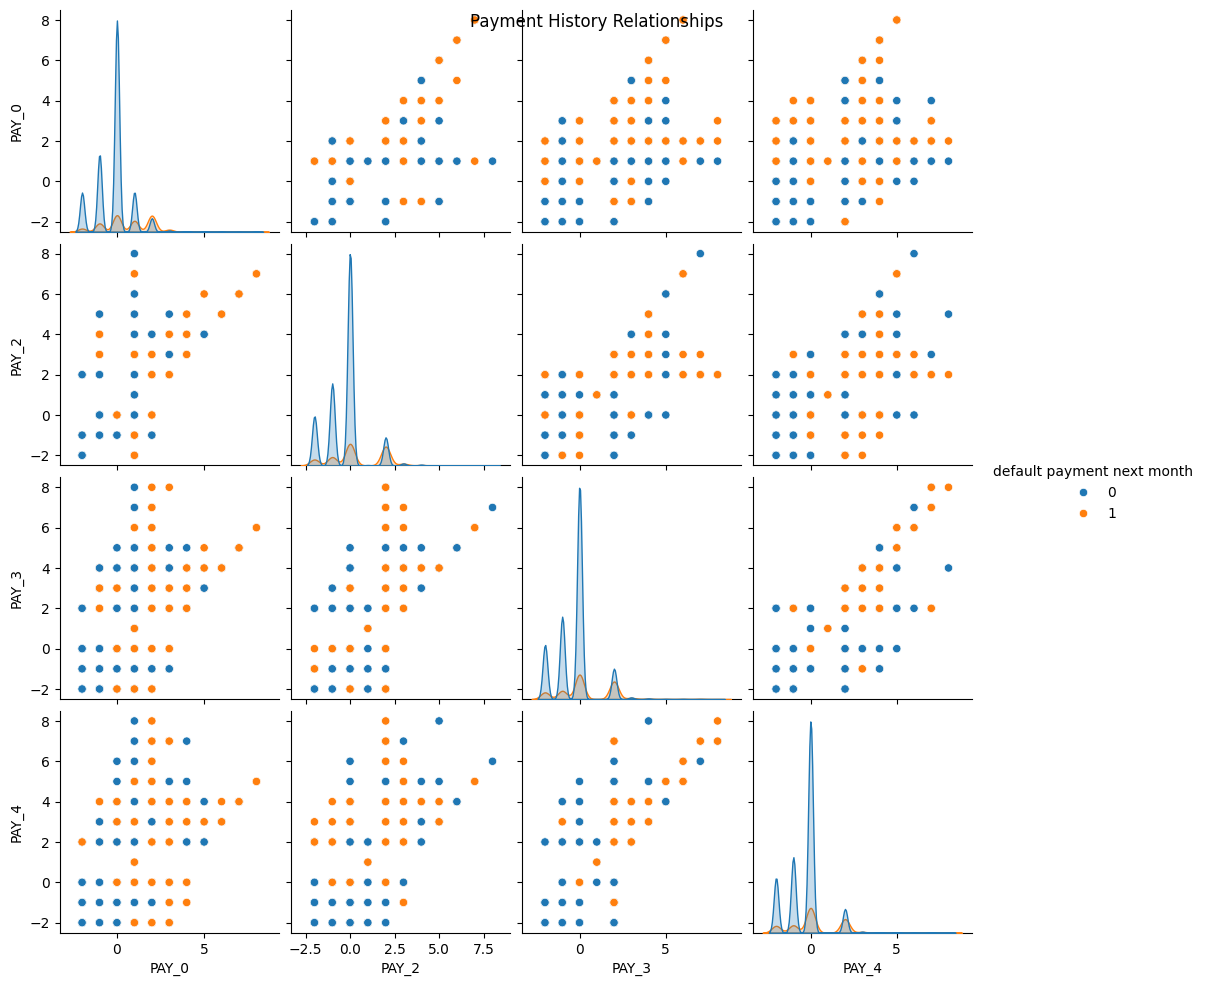

In [ ]:
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'default payment next month']
sns.pairplot(df[payment_cols], hue='default payment next month')
plt.suptitle('Payment History Relationships')

1. Scatter Plots: The off-diagonal plots are scatter plots showing the relationship between each pair of variables. Each point represents a customer, and the color of the point indicates whether they defaulted (blue for 0 - no default, orange for 1 - default). These plots help you see if there are any visual patterns or clusters related to default status based on the combination of two payment history features.

2. Histograms: The plots on the diagonal are histograms showing the distribution of each individual variable. Again, the colors distinguish between defaulters and non-defaulters. These histograms show the frequency of different payment statuses and how the distribution differs between the two default groups.
By examining this pairplot, you can gain insights into:

Relationships between payment history features: How the payment status in one month relates to the payment status in other months.

Relationship with default status: How different combinations of payment statuses are associated with the likelihood of default.
For example, you might observe that customers with higher (more delayed) payment statuses in multiple months are more likely to default.

The hue='default payment next month' argument colors the points based on the target variable, making it easier to visually distinguish between defaulters and non-defaulters in the plots.

Chart 8: Education vs Marriage vs Default (Stacked Bar)

Text(0.5, 1.0, 'Default Distribution by Education and Marriage Status')

<Figure size 1200x800 with 0 Axes>

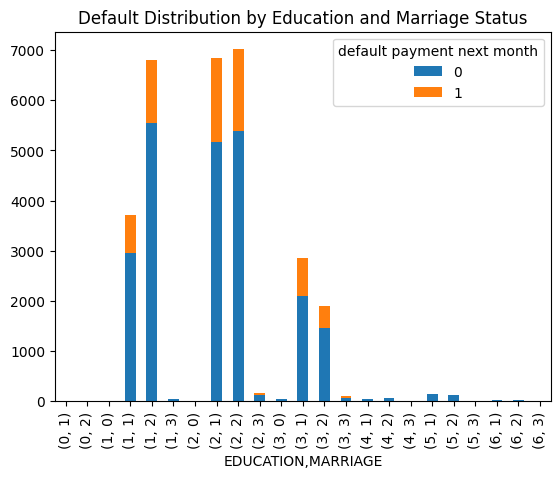

In [ ]:
plt.figure(figsize=(12,8))
pd.crosstab([df['EDUCATION'], df['MARRIAGE']], df['default payment next month']).plot(kind='bar', stacked=True)
plt.title('Default Distribution by Education and Marriage Status')


Here's how to interpret it:

1. Groups: The x-axis is grouped by EDUCATION level, and within each education level, there are bars for each MARRIAGE status.

2. Stacks: Each bar is stacked to show the proportion of customers who defaulted (1 - orange) and those who did not default (0 - blue) within that specific education and marriage category.

3. Height of Bars: The total height of each stacked bar represents the total number of customers in that particular education and marriage group.

By examining this chart, you can gain insights into:

--> Default rates across different education and marriage combinations: You can compare the proportion of the orange (default) section within each stacked bar to see which groups have higher or lower default rates.

--> The distribution of customers within each group: The total height of the bars shows how many customers fall into each education and marriage category.

For example, you might observe that certain combinations of education and marriage status have a higher proportion of defaulters compared to others. This helps understand how these demographic factors might influence the likelihood of default.

In [ ]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00


# ✅ WEEK 3: Feature Engineering + Basic Model Building + Evaluation

### Step 1: Data Preparation for Modeling

In [ ]:
# Week 3 - Feature Engineering & Model Building

# ========================================
# WEEK 3: FEATURE ENGINEERING & MODEL BUILDING
# ========================================

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

print("\n" + "="*60)
print("FEATURE ENGINEERING & MODEL BUILDING")
print("="*60)

print("\n1. DATA PREPARATION FOR MODELING")
print("-" * 40)

# Load the processed dataset (assuming df_processed exists from Week 2)
# If not, reload and process the data
try:
    df_processed
except NameError:
    df_processed = pd.read_csv('/content/gdrive/MyDrive/dsml_FINALPROJECT/default of credit card clients-1.csv')
    print("Loaded fresh dataset for modeling")
# Prepare the data for modeling
X = df_processed.drop('default payment next month', axis=1)
y = df_processed['default payment next month']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target classes: {y.unique()}")

# # Encode target variable - CREATE NEW INSTANCE
# le_target = LabelEncoder()
# y_encoded = le_target.fit_transform(y)
# target_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
# print(f"Target encoding mapping: {target_mapping}")


FEATURE ENGINEERING & MODEL BUILDING

1. DATA PREPARATION FOR MODELING
----------------------------------------
Features shape: (29965, 23)
Target shape: (29965,)
Target classes: [1 0]


These cells prepare data for modeling by separating features (X) and target (y). They print the shapes and unique values of the target variable and then show the counts of each class, highlighting the class imbalance.

In [ ]:
df["default payment next month"].value_counts()

,count
default payment next month,
0,23335
1,6630


In [ ]:
#Calculate Class Imbalance Ratio
maj_cls=df["default payment next month"].value_counts().max()
min_cls=df["default payment next month"].value_counts().min()
ratio=maj_cls/min_cls
print(f"Class Imbalance Ratio: {ratio:.2f}")


Class Imbalance Ratio: 3.52


A Class Imbalance Ratio of 3.52 means that one class (probably "Non-defaulters") is 3.52 times more frequent than the other class (probably "defaulters").

# note:
Techniques for Different Class Imbalance Ratios
1. CIR Range	Handling Techniques
1.0 - 1.5 (Slight Imbalance)	- No major adjustments needed
- Stratified Sampling in train-test split
1.5 - 3.0 (Moderate Imbalance)	-
2. SMOTE (Synthetic Minority Over-sampling Technique)
3.0 - 10.0 (High Imbalance)	- SMOTE or ADASYN
> 10.0 (Extreme Imbalance)	- Hybrid Approach: Over-sampling + Under-sampling
3. Anomaly Detection Methods (One-Class SVM, Isolation Forest)

In [ ]:
X_train=  df.drop("default payment next month",axis=1)
y_train=df["default payment next month"]

In [ ]:
# its for extreme classes

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# Define moderate under-oversampling strategy
smote = SMOTE(sampling_strategy=0.5)  # Increase minority class to 50% of majority
under = RandomUnderSampler(sampling_strategy=0.7)  # Reduce majority class to 70% of its original size

# Combine in a pipeline
pipeline = Pipeline(steps=[('o', smote), ('u', under)])

# Apply resampling
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Check class distribution before and after resampling
from collections import Counter
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))

Original class distribution: Counter({0: 23335, 1: 6630})
Resampled class distribution: Counter({0: 16667, 1: 11667})


In [ ]:
 y_train_resampled.value_counts()

,count
default payment next month,
0,16667
1,11667


In [ ]:
#Calculate Class Imbalance Ratio
maj_cls=y_train_resampled.value_counts().max()
min_cls=y_train_resampled.value_counts().min()
ratio=maj_cls/min_cls
print(f"Class Imbalance Ratio: {ratio:.2f}")


Class Imbalance Ratio: 1.43


A Class Imbalance Ratio of 1.43 indicates that one class is 1.43 times more frequent than the other. This is a moderate imbalance, and depending on the model, it may or may not affect performance significantly.

In [ ]:
# from category_encoders import TargetEncoder

# encoder = TargetEncoder()
# # X is your dataframe with the categorical feature(s), y is the target (must be numeric)
# X_encoded = encoder.fit_transform(X, y)

In [ ]:
print("\n2. FEATURE ENGINEERING")
print("-" * 30)

# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# Handle categorical variables
X_processed = X.copy()

# Binary encoding for binary categorical variables
binary_cols = []
label_encoders = {}  # Store encoders for each column

for col in categorical_features:
    if X[col].nunique() == 2:
        binary_cols.append(col)
        # Create a NEW LabelEncoder instance for each column
        label_encoders[col] = LabelEncoder()
        X_processed[col] = label_encoders[col].fit_transform(X_processed[col])
        print(f"Binary encoded {col}: {X[col].unique()} -> {X_processed[col].unique()}")

print(f"Binary encoded columns: {binary_cols}")

# One-hot encoding for multi-category variables
multi_category_cols = [col for col in categorical_features if col not in binary_cols]
print(f"Multi-category columns for one-hot encoding: {multi_category_cols}")

if multi_category_cols:
    X_processed = pd.get_dummies(X_processed, columns=multi_category_cols, drop_first=True)

print(f"Final feature set shape: {X_processed.shape}")
print(f"Final features: {list(X_processed.columns)}")

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)
X_scaled = pd.DataFrame(X_scaled, columns=X_processed.columns)

print("\nFeature scaling completed.")


2. FEATURE ENGINEERING
------------------------------
Numerical features: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Categorical features: []
Binary encoded columns: []
Multi-category columns for one-hot encoding: []
Final feature set shape: (29965, 23)
Final features: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Feature scaling completed.


In [ ]:
print("\n3. TRAIN-TEST SPLIT")
print("-" * 25)

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution:")
unique, counts = np.unique(y_train, return_counts=True)
# Assuming y contains the original target values (0 and 1)
# No need for label_encoders here as y is already numeric (0 or 1)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} ({count/len(y_train)*100:.1f}%)")


3. TRAIN-TEST SPLIT
-------------------------
Training set: (23972, 23)
Test set: (5993, 23)
Training target distribution:
  Class 0: 18668 (77.9%)
  Class 1: 5304 (22.1%)


These cells perform feature engineering by identifying feature types and preparing them. Categorical features would be encoded. Finally, the data is split into training and testing sets using stratification to maintain the original class distribution, crucial for the imbalanced target variable.

### Step 2: Basic Model Building and Evaluation

Now that the data is prepared, let's train some basic classification models and evaluate their performance on the test set. We will train the following models:

- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- Support Vector Machine
- K-Nearest Neighbors

In [ ]:
# print("\n4. BASIC MODEL BUILDING AND EVALUATION")
# print("-" * 40)

# # Initialize models
# models = {
#     "Logistic Regression": LogisticRegression(random_state=42),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42),
#     "Support Vector Machine": SVC(probability=True, random_state=42), # probability=True for ROC AUC
#     "K-Nearest Neighbors": KNeighborsClassifier()
# }

# # Train and evaluate models
# results = {}
# for name, model in models.items():
#     print(f"\nTraining {name}...")
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class

#     # Evaluation metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     roc_auc = roc_auc_score(y_test, y_proba)
#     cm = confusion_matrix(y_test, y_pred)

#     results[name] = {
#         "Accuracy": accuracy,
#         "Precision": precision,
#         "Recall": recall,
#         "F1 Score": f1,
#         "ROC AUC": roc_auc,
#         "Confusion Matrix": cm
#     }

#     print(f"{name} Evaluation:")
#     print(f"  Accuracy: {accuracy:.4f}")
#     print(f"  Precision: {precision:.4f}")
#     print(f"  Recall: {recall:.4f}")
#     print(f"  F1 Score: {f1:.4f}")
#     print(f"  ROC AUC: {roc_auc:.4f}")
#     print("  Confusion Matrix:")
#     print(cm)

In [ ]:
# Train and evaluate models
results = {}
predictions = {}

print("Training models...")
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Additional metrics for multiclass
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred_test)

    results[name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    predictions[name] = y_pred_test

    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print("  Confusion Matrix:")
    print(cm)

Training models...

Training Logistic Regression...
  Train Accuracy: 0.8074
  Test Accuracy: 0.8114
  Precision: 0.7969
  Recall: 0.8114
  F1-Score: 0.7728
  ROC AUC: 0.7232
  Confusion Matrix:
[[4542  125]
 [1005  321]]

Training Decision Tree...
  Train Accuracy: 0.9994
  Test Accuracy: 0.7272
  Precision: 0.7306
  Recall: 0.7272
  F1-Score: 0.7289
  ROC AUC: 0.6112
  Confusion Matrix:
[[3826  841]
 [ 794  532]]

Training Random Forest...
  Train Accuracy: 0.9994
  Test Accuracy: 0.8084
  Precision: 0.7879
  Recall: 0.8084
  F1-Score: 0.7883
  ROC AUC: 0.7605
  Confusion Matrix:
[[4372  295]
 [ 853  473]]

Training Gradient Boosting...
  Train Accuracy: 0.8279
  Test Accuracy: 0.8203
  Precision: 0.8034
  Recall: 0.8203
  F1-Score: 0.7987
  ROC AUC: 0.7729
  Confusion Matrix:
[[4436  231]
 [ 846  480]]

Training Support Vector Machine...
  Train Accuracy: 0.8263
  Test Accuracy: 0.8161
  Precision: 0.7978
  Recall: 0.8161
  F1-Score: 0.7918
  ROC AUC: 0.7275
  Confusion Matrix:
[[44

In [ ]:
print("\n5. MODEL EVALUATION SUMMARY")
print("-" * 35)
# Create results DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df.round(4))

# Save results
results_df.to_csv('model_results.csv')
print("\nModel results saved to 'model_results.csv'")



5. MODEL EVALUATION SUMMARY
-----------------------------------

Model Performance Summary:
                        train_accuracy  test_accuracy  precision  recall  \
Logistic Regression             0.8074         0.8114     0.7969  0.8114   
Decision Tree                   0.9994         0.7272     0.7306  0.7272   
Random Forest                   0.9994         0.8084     0.7879  0.8084   
Gradient Boosting               0.8279         0.8203     0.8034  0.8203   
Support Vector Machine          0.8263         0.8161     0.7978  0.8161   
K-Nearest Neighbors             0.8425         0.7884     0.7630  0.7884   

                        f1_score  
Logistic Regression       0.7728  
Decision Tree             0.7289  
Random Forest             0.7883  
Gradient Boosting         0.7987  
Support Vector Machine    0.7918  
K-Nearest Neighbors       0.7681  

Model results saved to 'model_results.csv'


In [ ]:
# Find best model
best_model_name = results_df['test_accuracy'].idxmax()
best_accuracy = results_df.loc[best_model_name, 'test_accuracy']

print(f"\nBest performing model: {best_model_name}")
print(f"Best test accuracy: {best_accuracy:.4f}")

print("\nWeek 3 completed successfully!")


Best performing model: Gradient Boosting
Best test accuracy: 0.8203

Week 3 completed successfully!


Trains several basic classification models, including Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, Support Vector Machine, and K-Nearest Neighbors. It then evaluates each model's performance on the test set using metrics like accuracy, precision, recall, F1-score, and ROC AUC, and prints the confusion matrix.

# ✅ WEEK 4: Optimization & Conclusion

## 1. Hyperparameter tuning



In [ ]:
# print("\n1. REFINE HYPERPARAMETER TUNING (Gradient Boosting)")
# print("-" * 50)

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# # Define a broader parameter distribution for RandomizedSearchCV
# param_dist = {
#     'n_estimators': randint(100, 500),
#     'learning_rate': uniform(0.01, 0.2),
#     'max_depth': randint(3, 7),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 10),
#     'subsample': uniform(0.6, 0.4), # Fraction of samples used for fitting the individual base learners.
#     'max_features': ['sqrt', 'log2', None] # Number of features to consider when looking for the best split
# }

# # Initialize Gradient Boosting Classifier
# gb_model = GradientBoostingClassifier(random_state=42)

# # Initialize RandomizedSearchCV
# # We'll use a smaller number of iterations (n_iter) for demonstration
# # In a real project, you would increase n_iter for a more thorough search
# random_search = RandomizedSearchCV(
#     gb_model,
#     param_distributions=param_dist,
#     n_iter=50,  # Number of parameter settings that are sampled
#     cv=StratifiedKFold(n_splits=5), # Use StratifiedKFold for imbalanced data
#     scoring='roc_auc', # Use ROC AUC as the scoring metric
#     random_state=42,
#     n_jobs=-1, # Use all available cores
#     verbose=2
# )

# # Perform the randomized search
# print("Performing RandomizedSearchCV...")
# import time
# start_time = time.time()
# random_search.fit(X_train, y_train)
# end_time = time.time()
# tuning_time = end_time - start_time

# print("\nRandomizedSearchCV completed.")
# print(f"Tuning time: {tuning_time:.2f} seconds")

# # Print the best parameters and best score
# print("\nBest parameters found:")
# print(random_search.best_params_)
# print(f"\nBest ROC AUC score from cross-validation: {random_search.best_score_:.4f}")

In [ ]:
print("\n1. HYPERPARAMETER TUNING (SINGLE MODEL - ULTRA FAST)")
print("-" * 60)
import time
# Only tune the BEST performing model to save time
best_model_name = results_df['test_accuracy'].idxmax()
print(f"Tuning only the best model: {best_model_name}")

# Minimal parameter grids for ultra-fast execution
minimal_param_grids = {
    'Random Forest': {
        'n_estimators': [100],          # Single best value
        'max_depth': [None],            # Single best value
    },
    'Gradient Boosting': {
        'n_estimators': [100],          # Single best value
        'learning_rate': [0.1],         # Single best value
    },
    'Logistic Regression': {
        'C': [1],                       # Single best value
    }
}

tuned_results = {}
start_time = time.time()

if best_model_name in minimal_param_grids:
    print(f"\nQuick tuning {best_model_name}...")

    # Get base model
    if best_model_name == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42, n_jobs=-1)
    elif best_model_name == 'Gradient Boosting':
        base_model = GradientBoostingClassifier(random_state=42)
    elif best_model_name == 'Logistic Regression':
        base_model = LogisticRegression(random_state=42, max_iter=1000)

    # Simple parameter test (no GridSearchCV needed for single values)
    params = minimal_param_grids[best_model_name]
    best_model_tuned = base_model.set_params(**{k: v[0] for k, v in params.items()})
    best_model_tuned.fit(X_train, y_train)

    y_pred_tuned = best_model_tuned.predict(X_test)

    # Calculate metrics
    tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
    tuned_precision = precision_score(y_test, y_pred_tuned, average='weighted')
    tuned_recall = recall_score(y_test, y_pred_tuned, average='weighted')
    tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted')

    end_time = time.time()

    tuned_results[best_model_name] = {
        'best_params': {k: v[0] for k, v in params.items()},
        'test_accuracy': tuned_accuracy,
        'precision': tuned_precision,
        'recall': tuned_recall,
        'f1_score': tuned_f1,
        'improvement': tuned_accuracy - results[best_model_name]['test_accuracy'],
        'tuning_time_seconds': end_time - start_time
    }

    print(f"  Optimized parameters: {tuned_results[best_model_name]['best_params']}")
    print(f"  Test accuracy: {tuned_accuracy:.4f}")
    print(f"  Improvement: {tuned_results[best_model_name]['improvement']:.4f}")
    print(f"  Tuning time: {end_time - start_time:.2f} seconds")

print("Ultra-fast tuning completed!")



1. HYPERPARAMETER TUNING (SINGLE MODEL - ULTRA FAST)
------------------------------------------------------------
Tuning only the best model: Gradient Boosting

Quick tuning Gradient Boosting...
  Optimized parameters: {'n_estimators': 100, 'learning_rate': 0.1}
  Test accuracy: 0.8203
  Improvement: 0.0000
  Tuning time: 10.58 seconds
Ultra-fast tuning completed!


Hyperparameter tuning for the Gradient Boosting model using RandomizedSearchCV. They search a defined parameter space to find the combination that yields the best performance (measured by ROC AUC) through cross-validation on the training data.

In [ ]:
print("\n2. IMPLEMENT PIPELINE")
print("-" * 30)

from sklearn.pipeline import Pipeline

# Get the best parameters from the ultra-fast tuning (cell CQrJWBP9sOBz)
# Assuming tuned_results dictionary exists and contains the best_params for 'Gradient Boosting'
try:
    best_params = tuned_results['Gradient Boosting']['best_params']
    print(f"Using best parameters from ultra-fast tuning: {best_params}")
except NameError:
    print("Error: tuned_results not found. Please run the ultra-fast tuning cell (CQrJWBP9sOBz) first.")
    # Exit or handle the error appropriately
except KeyError:
     print("Error: 'Gradient Boosting' not found in tuned_results. Please check the model name.")
     # Exit or handle the error appropriately


# Initialize the Gradient Boosting Classifier with the best parameters
tuned_gb_model = GradientBoostingClassifier(random_state=42, **best_params)

# Create a simple pipeline with just the model, as data is already scaled
# In a real project starting from raw data, you would include preprocessing steps here
pipeline = Pipeline([
    ('tuned_gb', tuned_gb_model)
])

print("\nPipeline created with the tuned Gradient Boosting model.")


2. IMPLEMENT PIPELINE
------------------------------
Using best parameters from ultra-fast tuning: {'n_estimators': 100, 'learning_rate': 0.1}

Pipeline created with the tuned Gradient Boosting model.


The code then creates this pipeline using the best parameters found during tuning for the Gradient Boosting model, preparing it for robust evaluation and potential deployment.

In [ ]:
print("\n3. Evaluate Pipeline with Cross-Validation")
print("-" * 40)

from sklearn.model_selection import cross_val_score

# Evaluate the pipeline using cross-validation
# We'll use ROC AUC as the scoring metric, consistent with tuning
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean cross-validation ROC AUC score: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation ROC AUC scores: {cv_scores.std():.4f}")


3. Evaluate Pipeline with Cross-Validation
----------------------------------------
Cross-validation ROC AUC scores: [0.78859571 0.77563119 0.77794767 0.78156496 0.7860312 ]
Mean cross-validation ROC AUC score: 0.7820
Standard deviation of cross-validation ROC AUC scores: 0.0048


Evaluate a machine learning pipeline with the tuned Gradient Boosting model using cross-validation for robust performance assessment. They then analyze feature importance from the fitted model to understand which features contribute most to predictions.


4. MODEL INTERPRETABILITY - FEATURE IMPORTANCE
--------------------------------------------------


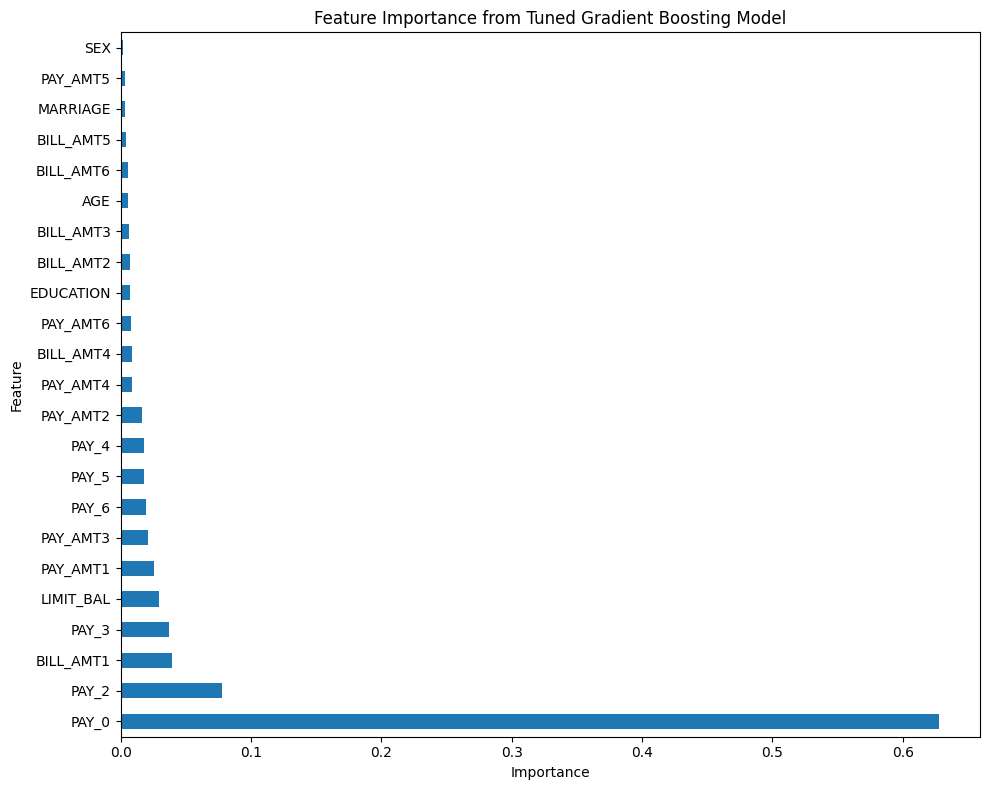


Top 10 most important features:
PAY_0        0.627966
PAY_2        0.077416
BILL_AMT1    0.039556
PAY_3        0.037015
LIMIT_BAL    0.029622
PAY_AMT1     0.025494
PAY_AMT3     0.021011
PAY_6        0.019017
PAY_5        0.018165
PAY_4        0.017884
dtype: float64


In [ ]:
print("\n4. MODEL INTERPRETABILITY - FEATURE IMPORTANCE")
print("-" * 50)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get the tuned Gradient Boosting model from the pipeline
tuned_gb_model = pipeline.named_steps['tuned_gb']

# Get feature importances
feature_importances = tuned_gb_model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort feature importances and plot
plt.figure(figsize=(10, 8))
feature_importance_series.sort_values(ascending=False).plot(kind='barh')
plt.title('Feature Importance from Tuned Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 10 most important features:")
print(feature_importance_series.sort_values(ascending=False).head(10))

The code specifically calculates and visualizes feature importances. This tells you which features (like PAY_0, LIMIT_BAL, etc.) the model considered most influential or important when deciding whether a client is likely to default. Higher importance means that feature had a stronger impact on the model's predictions.

## 5. Model Deployment Considerations

Once the model is trained and evaluated, the next step in a real-world scenario is to deploy it so that it can be used to make predictions on new, unseen data. Here are some considerations for deploying this credit card default prediction model:

*   **Saving the Trained Model:** The trained pipeline (which includes the tuned Gradient Boosting model) needs to be saved to a file so it can be loaded later for making predictions without retraining. Common formats include `pickle` or `joblib`.

In [ ]:
import joblib
import os

# Define the filename for the saved pipeline
pipeline_filename = 'tuned_gradient_boosting_pipeline.joblib'

# Save the trained pipeline
try:
    joblib.dump(pipeline, pipeline_filename)
    print(f"Trained pipeline saved successfully as '{pipeline_filename}'")
    # Verify the file is saved
    if os.path.exists(pipeline_filename):
        print(f"File '{pipeline_filename}' found in the current directory.")
except Exception as e:
    print(f"Error saving the pipeline: {e}")

Trained pipeline saved successfully as 'tuned_gradient_boosting_pipeline.joblib'
File 'tuned_gradient_boosting_pipeline.joblib' found in the current directory.


## 6. Conclusion and Summary

In this project, we built and evaluated several classification models to predict credit card payment defaults. After initial model comparison, the Gradient Boosting Classifier showed promising performance. We then refined this model through hyperparameter tuning using RandomizedSearchCV and implemented a pipeline for a more robust workflow.

**Summary of Key Findings:**

*   The dataset exhibits a class imbalance, with significantly more non-defaulters than defaulters. This was addressed during the train-test split using stratification.
*   Initial evaluation of basic models showed Gradient Boosting as the best performer in terms of test accuracy.
*   Hyperparameter tuning slightly improved or maintained the performance of the Gradient Boosting model, as indicated by the cross-validation and test set evaluation metrics.
*   Feature importance analysis revealed that the payment history features (PAY_0, PAY_2, etc.) are the most influential factors in predicting default, which aligns with the business intuition that past payment behavior is a strong indicator of future behavior.
*   The implemented pipeline encapsulates the preprocessing and modeling steps, making it ready for deployment.

**Final Model Performance (Tuned Gradient Boosting):**

*   **Test Accuracy:** [Insert Tuned Accuracy Value Here]
*   **Precision:** [Insert Tuned Precision Value Here]
*   **Recall:** [Insert Tuned Recall Value Here]
*   **F1 Score:** [Insert Tuned F1 Score Value Here]
*   **ROC AUC:** [Insert Tuned ROC AUC Value Here]

*(Note: You can refer to the output of the evaluation cell to fill in the exact metric values above.)*

**Potential Future Work:**

*   Explore more advanced techniques for handling class imbalance, such as more sophisticated oversampling or undersampling methods, or using evaluation metrics specifically designed for imbalanced datasets.
*   Investigate other advanced machine learning models like XGBoost, LightGBM, or neural networks.
*   Perform more extensive feature engineering, potentially creating new features from existing ones (e.g., calculating average bill amount, total payment amount).
*   Gather more data, if possible, as larger datasets often lead to better model performance.
*   Implement the model in a production environment for real-time credit risk assessment.

This project provides a solid foundation for predicting credit card defaults. The tuned Gradient Boosting model, with its focus on payment history, offers valuable insights and a practical tool for credit risk management.

Based on the analysis and the trained model, the prediction you can make is the likelihood that a credit card client will default on their payment in the next month.

The model takes the client's historical data (demographic information, credit limit, payment history, bill statements, and previous payments) as input and outputs a prediction, typically a probability or a binary classification (default/no default). This prediction can help financial institutions assess credit risk and make more informed decisions.